<a href="https://www.kaggle.com/code/eavprog/abscur2?scriptVersionId=280914836" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Оглавление проекта "Абсолютный валютный курс" 

Традиционно валютные курсы отражаются в виде парных курсов, показывающих соотношение одной валюты к другой. Это означает, что в числителе и знаменателе каждого курса находятся разные валюты. Однако, что если мы могли бы определить абсолютные курсы каждой отдельной валюты, вне зависимости от ее пары?

Проект "Абсолютные валютные курсы" ставит перед собой именно эту цель - рассчитать абсолютные курсы для 45 ведущих мировых валют на основе 85 доступных валютных пар. Используя математическую оптимизацию, мы находим абсолютную стоимость каждой валюты, позволяя инвесторам, трейдерам и аналитикам получить более глубокое понимание реальной ценности различных национальных денежных единиц.

Ежедневно рассчитываемые абсолютные курсы валют могут быть использованы для широкого спектра финансовых приложений - от портфельного управления до арбитража и хеджирования валютных рисков. Этот инновационный подход к валютным курсам дает уникальные возможности для принятия более обоснованных инвестиционных решений.

Добро пожаловать в мир "Абсолютных валютных курсов" - где традиционные представления о валютных соотношениях трансформируются в новое понимание истинной стоимости мировых денег.

![Проект \"Абсолютный валютный курс\"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:

Kaggle (расчёт): https://www.kaggle.com/code/eavprog/abscur2

Книга (данные): https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=449604484

Блог (новости): http://www.abscur.ru

Сайт (демонстрация): https://prog815.github.io/abscur2

ВКонтакте (обсуждение): https://vk.com/abscur

WhatsUp (новости): https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber (новости): https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Telegram (обсуждение): https://t.me/AbsCur

Одноклассники (обсуждение): https://ok.ru/group/53547043520717

GitHub (код): https://github.com/prog815/abscur

YouTube (новости): https://www.youtube.com/@eavprog8/community

Smart-lab (обсуждение): https://smart-lab.ru/my/eavpred/

VC (обсуждение): https://vc.ru/u/262921-aleksey-enin

In [1]:
import gspread
import json
import pandas as pd
from google.oauth2.service_account import Credentials
from kaggle_secrets import UserSecretsClient

def upload_dataframe_to_sheet(df, sheet_name, spreadsheet_id="1zAQ_dy5ut6V1L4vaWY5CvzRZGSPxrXX3k4lPs3ZltEY"):
    """
    Загружает DataFrame в указанный лист Google таблицы
    """
    try:
        # Получаем секрет
        user_secrets = UserSecretsClient()
        service_account_json = user_secrets.get_secret("GOOGLE_SERVICE_ACCOUNT_JSON")
        service_account_info = json.loads(service_account_json)
        
        # Аутентификация
        scope = ['https://www.googleapis.com/auth/spreadsheets']
        creds = Credentials.from_service_account_info(service_account_info, scopes=scope)
        gc = gspread.authorize(creds)
        
        # Открываем таблицу
        sh = gc.open_by_key(spreadsheet_id)
        worksheet = sh.worksheet(sheet_name)
        
        # Полностью очищаем лист
        worksheet.clear()
        
        # Подготавливаем данные
        data_to_update = [df.columns.tolist()] + df.values.tolist()
        
        # Записываем с правильным параметром value_input_option
        worksheet.update(data_to_update, 'A1', value_input_option='USER_ENTERED')
        
        print(f"✅ DataFrame успешно загружен в лист '{sheet_name}'")
        print(f"📊 Размер данных: {len(df)} строк × {len(df.columns)} столбцов")
        
        return True
        
    except Exception as e:
        print(f"❌ Ошибка: {e}")
        return False

# Пример использования:

# # Тестовые данные
# test_df = pd.DataFrame({
#     'date': ['2024-01-15', '2024-01-16', '2024-01-17'],
#     'sales': [1000, 1500, 2000],
#     'region': ['North', 'South', 'East'],
#     'profit': [200, 300, 400]
# })

# # Загружаем в лист "SalesData"
# upload_dataframe_to_sheet(test_df, "SalesData")

In [2]:
import pandas as pd
import os
import shutil
import numpy as np
import random
import time
from datetime import datetime, timedelta
from datetime import time as dt_time
import matplotlib.pyplot as plt
# from lib_gss_abscur2 import post_df_to_ssh

# Список валютных пар

Проект "Абсолютные валютные курсы" использует 85 ключевых валютных пар, включающих такие популярные сочетания, как AUDUSD, EURUSD, GBPUSD, USDJPY, а также менее распространенные пары, такие как USDARS, USDKZT и USDVND. Этот обширный набор данных по валютным парам, охватывающий 45 основных мировых валют, позволяет применять математическую оптимизацию для расчета абсолютной стоимости каждой денежной единицы. 

В этом блоке выводится структурированный анализ всех 85 валютных пар, используемых в проекте. Отображается:

• Полный перечень пар, сгруппированных по базовой валюте (12 групп)
• Количество пар для каждой базовой валюты
• Общая статистика: 85 пар, охватывающих 45 мировых валют
• Дополнительная аналитика по участию ключевых валют (USD - 40 пар, EUR - 15 пар, JPY - 7 пар)

Особое внимание уделено USD-парам (40 пар), которые включают как основные валюты (USDEUR, USDJPY, USDGBP), так и экзотические (USDARS, USDKZT, USDVND). EUR-пары (15) и другие группы представляют кросс-курсы между валютами без участия доллара.

Такой структурированный вывод позволяет наглядно увидеть охват валютного рынка и распределение пар, что является основой для последующей математической оптимизации абсолютных курсов.

In [3]:
def format_currency_pairs(pairs_list):
    """
    Форматирует список валютных пар для удобного отображения
    """
    # Сортируем пары
    sorted_pairs = sorted(pairs_list)
    
    # Группируем пары по базовой валюте
    pairs_by_currency = {}
    for pair in sorted_pairs:
        base_currency = pair[:3]
        if base_currency not in pairs_by_currency:
            pairs_by_currency[base_currency] = []
        pairs_by_currency[base_currency].append(pair)
    
    # Форматируем вывод
    result = []
    for base_currency in sorted(pairs_by_currency.keys()):
        result.append(f"\n{base_currency} pairs ({len(pairs_by_currency[base_currency])}):")
        result.append(", ".join(pairs_by_currency[base_currency]))
    
    # Добавляем общую статистику
    result.insert(0, f"Всего валютных пар: {len(sorted_pairs)}")
    result.insert(1, f"Уникальных базовых валют: {len(pairs_by_currency)}")
    result.append(f"\nОбщее количество: {len(sorted_pairs)} пар")
    
    return "\n".join(result)

# Исходные данные
pairs = """AUDHKD
AUDJPY
AUDSEK
AUDUSD
CADJPY
CADSEK
CHFAUD
CHFHKD
CHFJPY
EURAUD
EURCAD
EURCHF
EURCNY
EURCZK
EURGBP
EURHKD
EURILS
EURJPY
EURNOK
EURNZD
EURRUB
EURSEK
EURSGD
EURUSD
EURZAR
GBPAUD
GBPCAD
GBPCHF
GBPHKD
GBPJPY
GBPNOK
GBPRUB
GBPSEK
GBPSGD
GBPUSD
HKDSEK
HKDSGD
JPYHKD
JPYSEK
NZDSEK
NZDUSD
SGDAUD
SGDCHF
SGDJPY
USDAED
USDARS
USDBRL
USDCAD
USDCHF
USDCLP
USDCNY
USDCOP
USDCZK
USDDKK
USDEGP
USDGBP
USDHKD
USDHUF
USDIDR
USDILS
USDINR
USDISK
USDJPY
USDKRW
USDKWD
USDKZT
USDMXN
USDMYR
USDNOK
USDPEN
USDPHP
USDPKR
USDPLN
USDQAR
USDRON
USDRUB
USDSAR
USDSEK
USDSGD
USDTHB
USDTRY
USDTWD
USDUAH
USDVND
USDZAR""".split()

# Вывод результатов
print("=" * 60)
print("АНАЛИЗ ВАЛЮТНЫХ ПАР ПРОЕКТА")
print("=" * 60)
print(format_currency_pairs(pairs))
print("=" * 60)

# Дополнительная статистика
print("\nДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
print(f"Пар с USD: {len([p for p in pairs if 'USD' in p])}")
print(f"Пар с EUR: {len([p for p in pairs if 'EUR' in p])}")
print(f"Пар с JPY: {len([p for p in pairs if 'JPY' in p])}")
print("=" * 60)

АНАЛИЗ ВАЛЮТНЫХ ПАР ПРОЕКТА
Всего валютных пар: 85
Уникальных базовых валют: 10

AUD pairs (4):
AUDHKD, AUDJPY, AUDSEK, AUDUSD

CAD pairs (2):
CADJPY, CADSEK

CHF pairs (3):
CHFAUD, CHFHKD, CHFJPY

EUR pairs (16):
EURAUD, EURCAD, EURCHF, EURCNY, EURCZK, EURGBP, EURHKD, EURILS, EURJPY, EURNOK, EURNZD, EURRUB, EURSEK, EURSGD, EURUSD, EURZAR

GBP pairs (10):
GBPAUD, GBPCAD, GBPCHF, GBPHKD, GBPJPY, GBPNOK, GBPRUB, GBPSEK, GBPSGD, GBPUSD

HKD pairs (2):
HKDSEK, HKDSGD

JPY pairs (2):
JPYHKD, JPYSEK

NZD pairs (2):
NZDSEK, NZDUSD

SGD pairs (3):
SGDAUD, SGDCHF, SGDJPY

USD pairs (41):
USDAED, USDARS, USDBRL, USDCAD, USDCHF, USDCLP, USDCNY, USDCOP, USDCZK, USDDKK, USDEGP, USDGBP, USDHKD, USDHUF, USDIDR, USDILS, USDINR, USDISK, USDJPY, USDKRW, USDKWD, USDKZT, USDMXN, USDMYR, USDNOK, USDPEN, USDPHP, USDPKR, USDPLN, USDQAR, USDRON, USDRUB, USDSAR, USDSEK, USDSGD, USDTHB, USDTRY, USDTWD, USDUAH, USDVND, USDZAR

Общее количество: 85 пар

ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:
Пар с USD: 45
Пар с EUR: 16
Пар с

In [4]:
# pairs - это уже список валютных пар
# Например: pairs = ['EURUSD', 'GBPUSD', 'USDJPY', 'AUDUSD']

# Создаем DataFrame из списка
df_pairs = pd.DataFrame(pairs, columns=['Тикер пары'])

# Записываем на лист "Список валютных пар"
upload_dataframe_to_sheet(df_pairs, "Список тикеров пар")

✅ DataFrame успешно загружен в лист 'Список тикеров пар'
📊 Размер данных: 85 строк × 1 столбцов


True

# Список валют

Этот список включает 45 основных мировых валют, охватывающих ведущие экономики Северной Америки, Европы, Азии, Океании и Ближнего Востока. Здесь представлены такие известные денежные единицы, как доллар США (USD), евро (EUR), британский фунт (GBP), японская иена (JPY) и китайский юань (CNY), а также менее распространенные валюты, такие как новозеландский доллар (NZD), южноафриканский рэнд (ZAR) и индийская рупия (INR). Этот обширный набор данных по различным национальным денежным системам позволяет проекту "Абсолютные валютные курсы" применять передовые математические методы для определения внутренней стоимости каждой из этих 45 валют.

In [5]:
curs = set()

for pair in pairs:
    curs.add(pair[:3])
    curs.add(pair[3:])

curs = sorted(list(curs))

print(", ".join(curs))
print(len(curs))

AED, ARS, AUD, BRL, CAD, CHF, CLP, CNY, COP, CZK, DKK, EGP, EUR, GBP, HKD, HUF, IDR, ILS, INR, ISK, JPY, KRW, KWD, KZT, MXN, MYR, NOK, NZD, PEN, PHP, PKR, PLN, QAR, RON, RUB, SAR, SEK, SGD, THB, TRY, TWD, UAH, USD, VND, ZAR
45


In [6]:
# Создаем DataFrame из списка тикеров валют
df_curs = pd.DataFrame(curs, columns=['Тикер валюты'])

# Записываем на лист "Список тикеров валют"
upload_dataframe_to_sheet(df_curs, "Список тикеров валют")

✅ DataFrame успешно загружен в лист 'Список тикеров валют'
📊 Размер данных: 45 строк × 1 столбцов


True

## Визуализация валютных связей

Данный блок представляет граф взаимосвязей между 45 валютами на основе 85 валютных пар. Граф наглядно демонстрирует, какие валюты имеют прямые котировки друг с другом, что является фундаментальной основой для расчета абсолютных курсов.

**Особенности визуализации:**
- Размер узла показывает количество связей валюты с другими валютами
- Красным цветом выделены основные резервные валюты (USD, EUR, GBP, JPY и др.)
- Граф позволяет идентифицировать валютные хабы и периферийные валюты

Такой анализ помогает понять структуру валютного рынка и выявить ключевые точки для математической оптимизации абсолютных значений курсов.

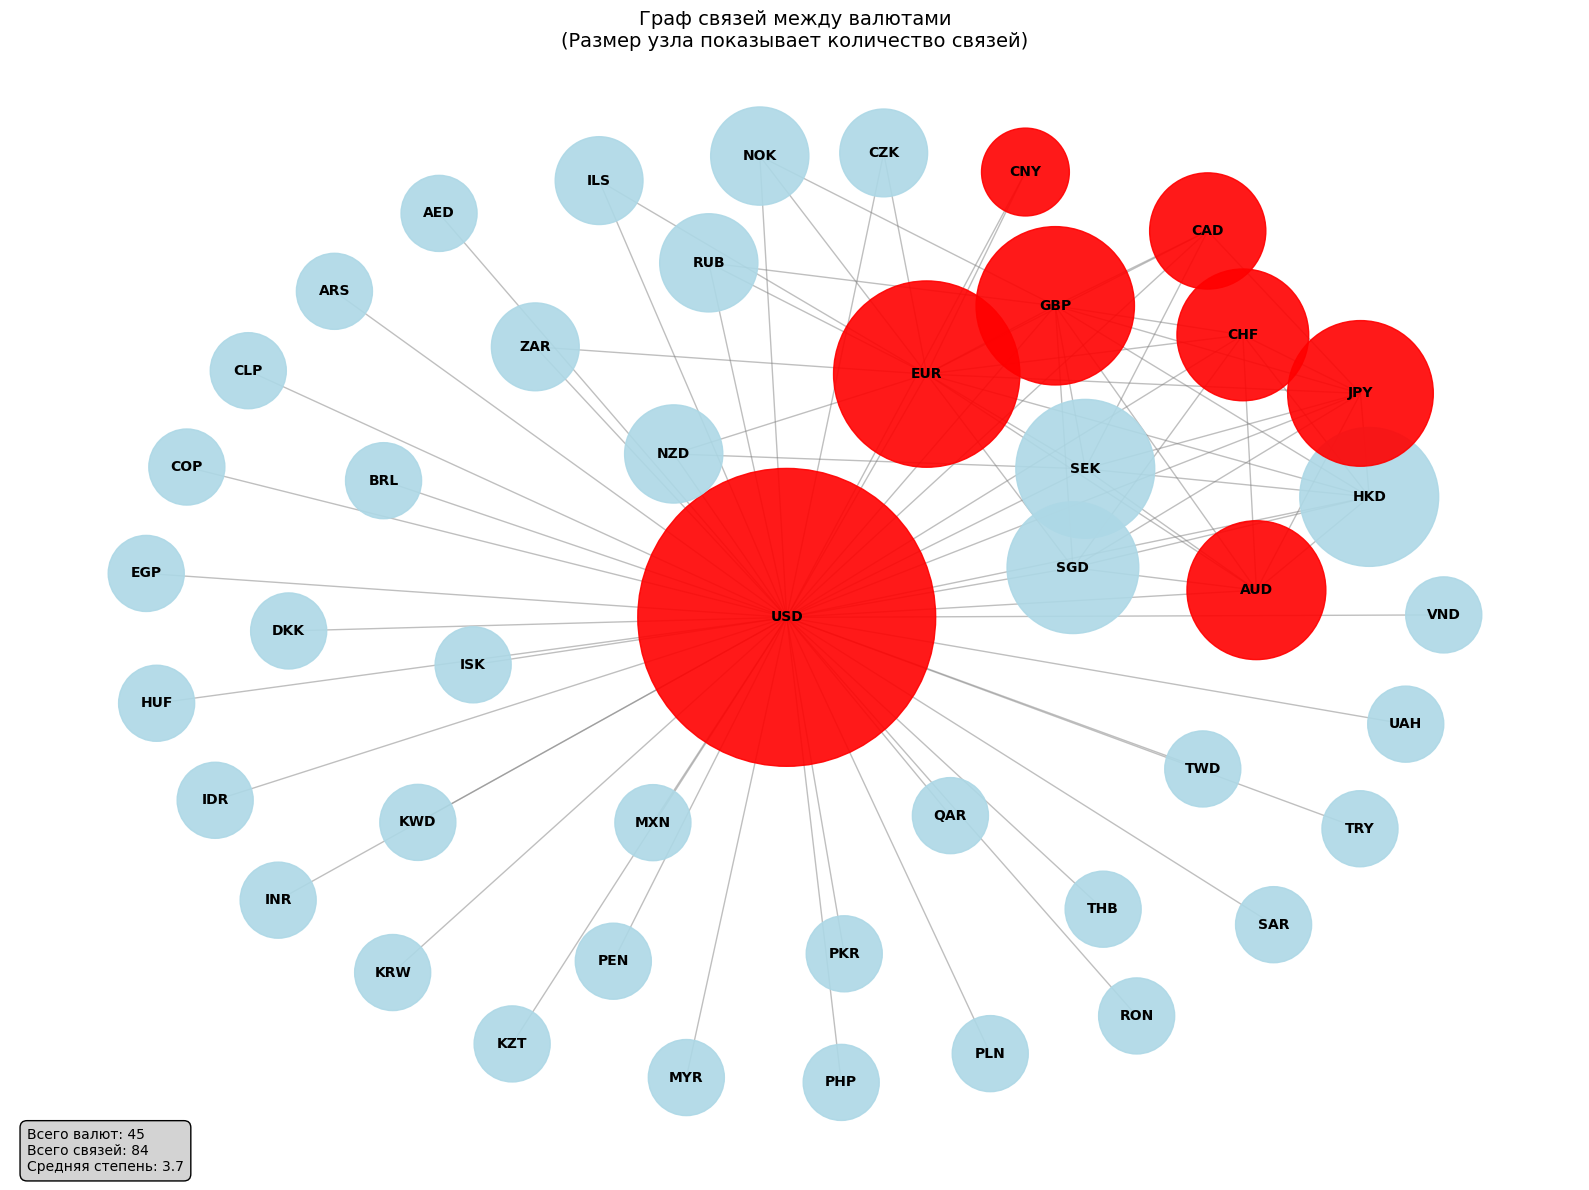

СТАТИСТИКА ГРАФА:
Узлов (валют): 45
Ребер (связей): 84
Плотность графа: 0.085

Топ-10 валют по количеству связей:
USD: 44 связей
EUR: 16 связей
GBP: 11 связей
JPY: 9 связей
AUD: 8 связей
HKD: 8 связей
SEK: 8 связей
CHF: 7 связей
SGD: 7 связей
CAD: 5 связей


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Создание графа
G = nx.Graph()

# Добавление ребер в граф из списка pairs
for pair in pairs:
    currency1 = pair[:3]
    currency2 = pair[3:]
    G.add_edge(currency1, currency2)

# Настройка параметров визуализации
plt.figure(figsize=(16, 12))

# Используем разные layout'ы для лучшего отображения
pos = nx.kamada_kawai_layout(G)  # Или nx.spring_layout(G, k=0.5, iterations=50)

# Рассчитываем степень центральности для размера узлов
node_sizes = [2000 + 1000 * G.degree(currency) for currency in G.nodes()]

# Цвета для узлов - разные для основных и второстепенных валют
major_currencies = ['USD', 'EUR', 'GBP', 'JPY', 'CNY', 'CHF', 'CAD', 'AUD']
node_colors = ['red' if currency in major_currencies else 'lightblue' for currency in G.nodes()]

# Рисуем граф с улучшенными параметрами
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Добавляем легенду и заголовок
plt.title('Граф связей между валютами\n(Размер узла показывает количество связей)', fontsize=14)
plt.axis('off')  # Отключаем оси

# Добавляем информационную панель
info_text = f"Всего валют: {len(G.nodes())}\nВсего связей: {len(G.edges())}\nСредняя степень: {sum(dict(G.degree()).values())/len(G.nodes()):.1f}"
plt.figtext(0.02, 0.02, info_text, fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray"))

plt.tight_layout()
plt.show()

# Дополнительно: выводим статистику
print("СТАТИСТИКА ГРАФА:")
print(f"Узлов (валют): {len(G.nodes())}")
print(f"Ребер (связей): {len(G.edges())}")
print(f"Плотность графа: {nx.density(G):.3f}")
print("\nТоп-10 валют по количеству связей:")
degree_dict = dict(G.degree())
for currency, degree in sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{currency}: {degree} связей")

In [8]:
# Поиск пар с одинаковыми валютами (петель)
print("Поиск пар с одинаковыми валютами:")
found = False
for pair in pairs:
    if pair[:3] == pair[3:]:
        print(f"Найдена петля: {pair}")
        found = True

if not found:
    print("Пар с одинаковыми валютами не найдено")

# Поиск дубликатов в списке пар
print("\nПоиск дубликатов в списке:")
from collections import Counter
pair_counts = Counter(pairs)
duplicates = {pair: count for pair, count in pair_counts.items() if count > 1}

if duplicates:
    print("Найдены дубликаты пар:")
    for pair, count in duplicates.items():
        print(f"{pair}: {count} раз(а)")
else:
    print("Дубликатов пар не найдено")

# Проверка симметричных пар (например, EURUSD и USDEUR)
print("\nПоиск симметричных пар:")
symmetrical_pairs = set()
for pair in pairs:
    reverse_pair = pair[3:] + pair[:3]
    if reverse_pair in pairs and pair != reverse_pair:
        symmetrical_pairs.add((pair, reverse_pair))

if symmetrical_pairs:
    print("Найдены симметричные пары:")
    for pair1, pair2 in symmetrical_pairs:
        print(f"{pair1} <-> {pair2}")
else:
    print("Симметричных пар не найдено")

# Проверка уникальности пар
print(f"\nОбщая статистика:")
print(f"Всего пар в списке: {len(pairs)}")
print(f"Уникальных пар: {len(set(pairs))}")
print(f"Разница: {len(pairs) - len(set(pairs))}")

Поиск пар с одинаковыми валютами:
Пар с одинаковыми валютами не найдено

Поиск дубликатов в списке:
Дубликатов пар не найдено

Поиск симметричных пар:
Найдены симметричные пары:
GBPUSD <-> USDGBP
USDGBP <-> GBPUSD

Общая статистика:
Всего пар в списке: 85
Уникальных пар: 85
Разница: 0


# **Загрузка котировок**

В тетрадке реализована загрузка исторических курсов для 85 валютных пар, торгуемых на Forex. Все курсы сохраняются в каталоге pairs тетрадки. 

Ключевым компонентом проекта "Абсолютные валютные курсы" является загрузка и обработка исторических данных по курсам 85 валютных пар, торгуемых на международном валютном рынке Forex. Эти данные охватывают курсы 45 ведущих мировых валют, таких как доллар США, евро, британский фунт, японская иена и китайский юань, а также менее распространенные денежные единицы, включая южноафриканский рэнд, индийскую рупию и российский рубль.

Вся историческая информация по валютным парам получается с помощью API сервиса Alpha Vantage и сохраняется в специальном каталоге `pairs` внутри основной тетрадки проекта. Это позволяет легко обрабатывать набор данных, необходимый для расчета абсолютных курсов валют.

In [9]:
# копирование предыдущих
! mkdir pairs
! cp -rf /kaggle/input/abscur2/pairs/*.csv ./pairs
! mkdir commodities
! cp -rf /kaggle/input/abscur2/commodities/*.csv ./commodities

## *Загрузка валют*

In [10]:
# Непосредственно загрузка

from lib_av import get_forex_price

for pair in pairs[:]:
    for n in range(3):
        try:
            df = get_forex_price(pair,outputsize='full')
            df.to_csv("./pairs/" + pair + ".csv")
            print(pair, "- загружена. С " + str(df.index.min().date()) + ". По " + str(df.index.max().date()) + ". Строк " + str(df.shape[0]) + ".")
            time.sleep(5)
            break
        except Exception as e:
            print(pair, "- ошибка загрузки")
            time.sleep(15)

AUDHKD - загружена. С 2023-01-07. По 2025-11-21. Строк 986.
AUDJPY - загружена. С 2022-12-24. По 2025-11-21. Строк 1000.
AUDSEK - загружена. С 2022-12-24. По 2025-11-21. Строк 1000.
AUDUSD - загружена. С 2006-09-22. По 2025-11-21. Строк 5000.
CADJPY - загружена. С 2023-01-06. По 2025-11-21. Строк 1000.
CADSEK - загружена. С 2023-01-06. По 2025-11-21. Строк 1000.
CHFAUD - загружена. С 2022-12-25. По 2025-11-21. Строк 960.
CHFHKD - загружена. С 2023-01-08. По 2025-11-21. Строк 947.
CHFJPY - загружена. С 2022-11-11. По 2025-11-21. Строк 1000.
EURAUD - загружена. С 2006-09-22. По 2025-11-21. Строк 5000.
EURCAD - загружена. С 2006-09-22. По 2025-11-21. Строк 5000.
EURCHF - загружена. С 2006-09-22. По 2025-11-21. Строк 5000.
EURCNY - загружена. С 2008-09-04. По 2025-11-21. Строк 4465.
EURCZK - загружена. С 2014-11-07. По 2025-11-21. Строк 2880.
EURGBP - загружена. С 2006-09-22. По 2025-11-21. Строк 5000.
EURHKD - загружена. С 2006-09-22. По 2025-11-21. Строк 5000.
EURILS - загружена. С 2025-

## *Загрузка товаров*

In [11]:
from lib_av import get_any_price

commodities = ["GLD","SLV","PPLT","PALL","WTI"]
# Непосредственно загрузка

for item in commodities[:]:
    for n in range(3):
        try:
            df = get_any_price(item,outputsize='full')
            df.to_csv("./commodities/" + item + ".csv")
            print(item, "- загружена. С " + str(df.index.min().date()) + ". По " + str(df.index.max().date()) + ". Строк " + str(df.shape[0]) + ".")
            time.sleep(5)
            break
        except Exception as e:
            print(item, "- ошибка загрузки")
            time.sleep(15)

GLD - ошибка загрузки
GLD - ошибка загрузки
GLD - ошибка загрузки
SLV - ошибка загрузки
SLV - ошибка загрузки
SLV - ошибка загрузки
PPLT - ошибка загрузки
PPLT - ошибка загрузки
PPLT - ошибка загрузки
PALL - ошибка загрузки
PALL - ошибка загрузки
PALL - ошибка загрузки
WTI - ошибка загрузки
WTI - ошибка загрузки
WTI - ошибка загрузки


## Соединяем парные курсы в одну таблицу

После загрузки исторических данных по 85 валютным парам, в тетрадке реализуется процесс сбора всех курсов закрытия в единую таблицу. Этот сводный файл с котировками сохраняется под именем pairs_close.csv и доступен для скачивания без ограничений.

**Ключевые улучшения процесса:**
- Исправлена критическая ошибка в алгоритме объединения данных
- Теперь сохраняется полная историческая глубина (более 10 лет данных)
- Данные очищены от статистических выбросов и артефактов
- Пропущенные значения заполнены с использованием forward и backward filling
- Обеспечена целостность временных рядов для всех 85 валютных пар

Таким образом, вся информация по парным валютным курсам собирается в структурированном виде, что значительно упрощает дальнейшую обработку данных и математическую оптимизацию абсолютных курсов.

Для наглядного представления динамики парных валютных курсов, в блоге проекта по адресу https://www.abscur.ru/p/blog-page_54.html размещены интерактивные графики. Это позволяет пользователям визуально анализировать поведение различных валютных пар.

**Технические характеристики результирующего файла:**
- Диапазон дат: от [минимальная дата] до [текущая дата]
- Размерность: ~[количество дней] × 85 показателей
- Формат: CSV с ежедневными котировками закрытия
- Кодировка: UTF-8

In [12]:
pairs_close = pd.DataFrame()

min_start_date = pd.to_datetime('2100-01-01')  # Инициализируем будущей датой

for pair in pairs:
    try:
        fn = "./pairs/" + pair + ".csv"
        df = pd.read_csv(fn, index_col='Date', parse_dates=True)
        
        # Обновляем минимальную дату начала
        min_start_date = min(min_start_date, df.index.min())
        
        # Переименовываем колонку Close
        df = df[['Close']].rename(columns={'Close': pair})
        
        # Присоединяем к основному DataFrame
        if pairs_close.empty:
            pairs_close = df
        else:
            pairs_close = pairs_close.join(df, how='outer')
            
    except Exception as e:
        print(f"Ошибка загрузки {pair}: {e}")

# Сортируем по дате
pairs_close.sort_index(inplace=True)

# Обрезаем до минимальной даты начала (полная история)
pairs_close = pairs_close[pairs_close.index >= min_start_date]

# Обработка выбросов и пропусков
pairs_close = pairs_close.where(pairs_close >= pairs_close.quantile(0.01, axis=0) / 2, other=np.nan)
pairs_close = pairs_close.where(pairs_close <= pairs_close.quantile(0.99, axis=0) * 2, other=np.nan)

pairs_close.ffill(inplace=True)
pairs_close.bfill(inplace=True)

print(f"Диапазон дат: {pairs_close.index.min()} - {pairs_close.index.max()}")
print(f"Количество строк: {len(pairs_close)}")
print(f"Количество колонок: {len(pairs_close.columns)}")

pairs_close.to_csv("pairs_close.csv")
pairs_close

Диапазон дат: 2006-03-30 00:00:00 - 2025-11-21 00:00:00
Количество строк: 5904
Количество колонок: 85


,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-30,5.36676,89.25012,7.07271,0.7499,98.23661,7.82472,1.59516,8.42125,147.48108,1.7039,...,46.7720,3.7516,7.3877,1.5799,32.78,2.2669,32.639,14.4705,21270.0,11.2550
2006-03-31,5.36676,89.25012,7.07271,0.7499,98.23661,7.82472,1.59516,8.42125,147.48108,1.7039,...,46.7720,3.7516,7.3877,1.5799,32.78,2.2669,32.639,14.4705,21270.0,11.2550
2006-04-03,5.36676,89.25012,7.07271,0.7499,98.23661,7.82472,1.59516,8.42125,147.48108,1.7039,...,46.7720,3.7516,7.3877,1.5799,32.78,2.2669,32.639,14.4705,21270.0,11.2550
2006-04-04,5.36676,89.25012,7.07271,0.7499,98.23661,7.82472,1.59516,8.42125,147.48108,1.7039,...,46.7720,3.7516,7.3877,1.5799,32.78,2.2669,32.639,14.4705,21270.0,11.2550
2006-04-05,5.36676,89.25012,7.07271,0.7499,98.23661,7.82472,1.59516,8.42125,147.48108,1.7039,...,46.7720,3.7516,7.3877,1.5799,32.78,2.2669,32.639,14.4705,21270.0,11.2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-17,5.04720,100.78181,6.14435,0.6492,110.47538,6.73534,1.93561,9.76941,195.07414,1.7842,...,81.2455,3.7501,9.4645,1.3029,32.41,42.2207,31.173,42.0770,26335.0,17.1608
2025-11-18,5.06453,101.16830,6.15982,0.6506,111.18261,6.76956,1.92274,9.73780,194.52089,1.7789,...,80.9500,3.7500,9.4679,1.3016,32.36,42.3385,31.103,42.0889,26378.0,17.1702
2025-11-19,5.04591,101.78606,6.17757,0.6477,111.85053,6.78840,1.91720,9.67403,195.14467,1.7800,...,80.5455,3.7502,9.5377,1.3067,32.43,42.3010,31.189,42.0884,26376.0,17.1835


In [13]:
# Сбрасываем индекс
pairs_close_reset = pairs_close.reset_index()
date_column = pairs_close_reset.columns[0]

# Преобразуем даты в правильный формат БЕЗ тильды
pairs_close_reset[date_column] = pairs_close_reset[date_column].dt.strftime('%Y-%m-%d')

# Записываем таблицу
upload_dataframe_to_sheet(pairs_close_reset, "Парные валютные курсы")

✅ DataFrame успешно загружен в лист 'Парные валютные курсы'
📊 Размер данных: 5904 строк × 86 столбцов


True

Представленная таблица содержит исторические данные по 85 ключевым валютным парам, таким как AUDHKD, AUDJPY, AUDSEK, AUDUSD, CADJPY и многие другие. Каждая строка в таблице соответствует определенной дате, а столбцы отражают котировки закрытия для каждой из этих 85 валютных пар.

In [14]:
# Импортируем библиотеки
from kaggle_secrets import UserSecretsClient
from yadisk import YaDisk
import pandas as pd
import os

# Получаем секретный ключ
user_secrets = UserSecretsClient()
secret_value = user_secrets.get_secret("YandexDiskWriter")

# Инициализируем клиент Яндекс Диска
disk = YaDisk(token=secret_value)

def upload_dataframe_to_yandex(df, file_name):
    """
    Функция для сохранения DataFrame в Excel с индексом и загрузки на Яндекс Диск
    
    Параметры:
    df (DataFrame): DataFrame для сохранения
    file_name (str): имя файла на Яндекс Диске без расширения
    """
    try:
        # Создаем копию DataFrame
        df_copy = df.copy()
        
        # Преобразуем индекс в столбец в копии
        df_copy = df_copy.reset_index()
        
        # Формируем локальный путь к файлу
        local_excel_path = f"{file_name}.xlsx"
        
        # Сохраняем копию DataFrame в Excel
        df_copy.to_excel(
            local_excel_path,
            index=False,                # индекс уже сохранен как столбец
            sheet_name='Sheet1'         # имя листа
        )
        
        # Формируем путь на Яндекс Диске
        remote_path = f'/abscur-data/{file_name}.xlsx'
        
        # Загружаем файл на Диск
        disk.upload(local_excel_path, remote_path, overwrite=True)
        
        # Удаляем временный файл
        os.remove(local_excel_path)
        
        print(f"Файл {file_name}.xlsx успешно загружен на Яндекс Диск")
        
    except Exception as e:
        print(f"Произошла ошибка при загрузке файла: {str(e)}")
        if os.path.exists(local_excel_path):
            os.remove(local_excel_path)  # очищаем временный файл при ошибке

# Пример использования:
# upload_dataframe_to_yandex(ваш_dataframe, 'отчет_2025')


In [15]:
upload_dataframe_to_yandex(pairs_close, 'pairs_close')

Файл pairs_close.xlsx успешно загружен на Яндекс Диск


# **Последние парные валютные курсы**

В рамках проекта "Абсолютные валютные курсы" формируется таблица, содержащая последние доступные котировки закрытия для всех 85 загруженных валютных пар. Этот сводный файл с актуальными курсами сохраняется в тетрадке под названием `pairs_last.csv` и доступен для свободного скачивания.

**Ниже отображается:** актуальная сводная таблица курсов закрытия по состоянию на [дата]. В таблице представлены все 85 валютных пар в удобном транспонированном формате, где:
- **Строки** - валютные пары (например, EURUSD, GBPJPY, USDRUB)
- **Столбец** - значение курса закрытия на последнюю доступную дату

**Особенности данных:**
- Курсы обновляются ежедневно
- Данные отражают официальные котировки закрытия торгового дня
- Валютные пары отсортированы в алфавитном порядке
- Таблица автоматически обновляется при каждом запуске тетрадки

Для наглядного представления актуальных парных валютных курсов на странице блога проекта по ссылке https://www.abscur.ru/p/blog-page_52.html размещены интерактивные таблицы. Пользователи могут визуально анализировать текущее состояние различных валютных пар.

**Применение данных:** эти курсы служат исходными данными для математической оптимизации и расчета абсолютных значений валют в следующих разделах тетрадки.

In [16]:
pairs_last = pairs_close.iloc[[-1],:].T
pairs_last.index.name = "Валютные пары"

# Преобразуем Timestamp в строку с нужным форматом
last_date_str = pairs_last.columns[0].strftime('%Y-%m-%d')
pairs_last.columns = ['Курс на ' + last_date_str]

# сохранем на диск
pairs_last.to_csv("pairs_last.csv")

upload_dataframe_to_yandex(pairs_last, 'pairs_last')

# # передаем в книгу на Google Drive
# post_df_to_ssh("Последние парные валютные курсы",pairs_last)

pairs_last

Файл pairs_last.xlsx успешно загружен на Яндекс Диск


,Курс на 2025-11-21
Валютные пары,
AUDHKD,5.02263
AUDJPY,100.93411
AUDSEK,6.15182
AUDUSD,0.64540
CADJPY,110.90703
...,...
USDTRY,42.43530
USDTWD,31.33900
USDUAH,42.23610


In [17]:
# Просто сбрасываем индекс и записываем
upload_dataframe_to_sheet(pairs_last.reset_index(), "Последние парные курсы")

✅ DataFrame успешно загружен в лист 'Последние парные курсы'
📊 Размер данных: 85 строк × 2 столбцов


True

# Расчет абсолютных курсов

Ключевым этапом проекта "Абсолютные валютные курсы" является вычисление внутренней стоимости каждой из 45 ведущих мировых валют. Этот процесс реализован в тетрадке, доступной по ссылке https://www.kaggle.com/code/eavprog/abscur-approks.

Любой парный валютный курс может быть представлен как отношение двух абсолютных валютных курсов. Например:

$$
EURUSD = \frac{EUR}{USD}
$$

Для расчета абсолютных курсов, в первую очередь, формируется матрица перехода между парными и абсолютными котировками. Эта матрица состоит из нулей, единиц и минус единиц:

- Нуль означает отсутствие связи между валютной парой и конкретной валютой.
- Единица указывает, что валюта находится в числителе парного курса.
- Минус единица означает, что валюта находится в знаменателе парного курса.

Таким образом, горизонтали матрицы соответствуют парным валютным курсам, а вертикали - конкретным валютам. Эта структура данных служит основой для дальнейшего применения методов математической оптимизации.

Используя построенную матрицу перехода и данные по 85 валютным парам, проект вычисляет абсолютные курсы 45 ведущих мировых валют. Результатом является набор внутренних стоимостей каждой национальной денежной единицы, который может быть применен в широком спектре финансовых задач.

Такой инновационный подход к определению абсолютных валютных курсов открывает новые возможности для более глубокого понимания динамики мировых валютных рынков.

In [18]:
# Строим матрицу перехода от абсолютныых курсов к парным
M = np.zeros([len(pairs),len(curs)])
for pair in pairs:
    cur1,cur2 = pair[:3],pair[3:]
    pair_index = pairs.index(pair)
    cur1_index = curs.index(cur1)
    cur2_index = curs.index(cur2)
    M[pair_index,cur1_index] = 1
    M[pair_index,cur2_index] = -1
M 

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0., -1.]])

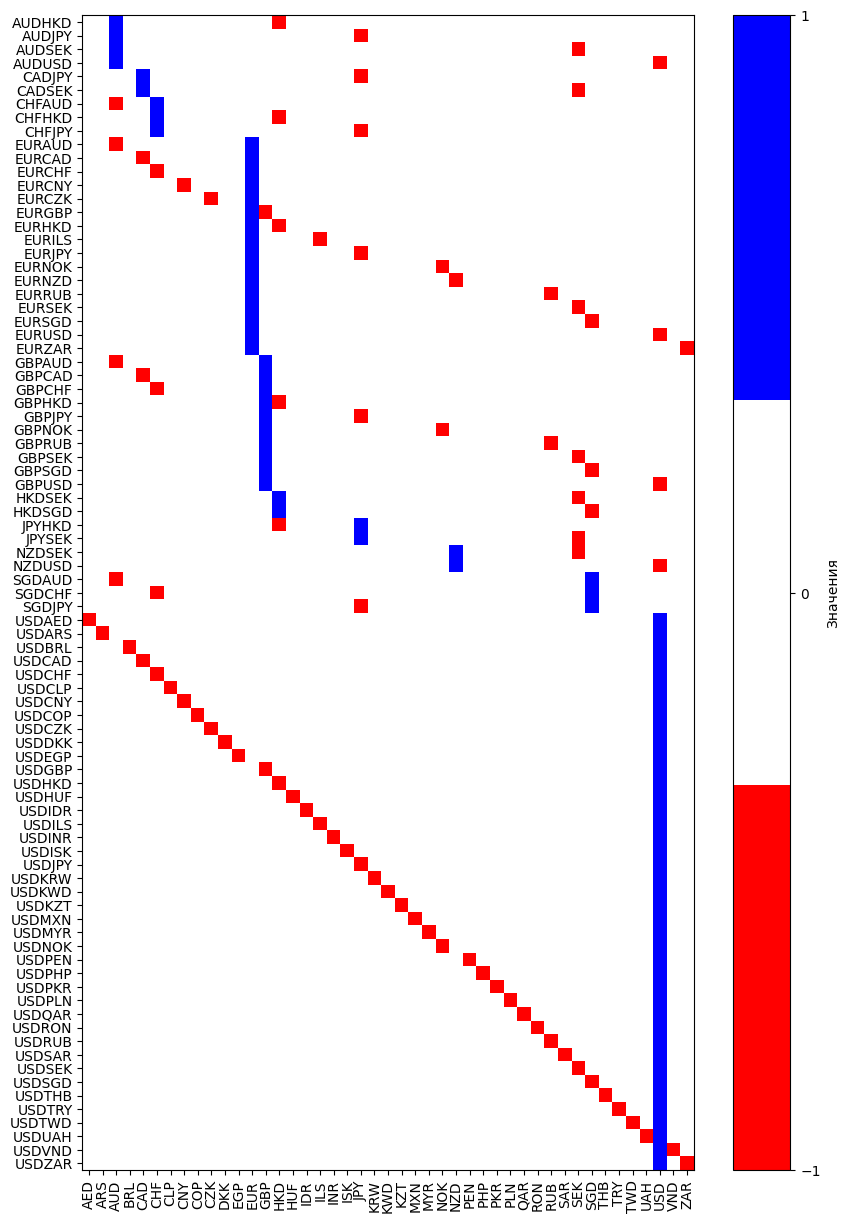

In [19]:
# выводим матрицу

# Создание пользовательской цветовой карты
from matplotlib.colors import ListedColormap

# Определяем цвета для значений: белый для 0, синий для +1 и красный для -1
colors = ['red', 'white', 'blue']
cmap = ListedColormap(colors)

# Определяем границы и значения для цветовой карты
bounds = [-1.5, -0.5, 0.5, 1.5]  # Границы для -1, 0 и +1
norm = plt.Normalize(vmin=-1, vmax=1)

# Отображение матрицы
plt.figure(figsize=(10, 15))
plt.imshow(M, cmap=cmap, norm=norm)
plt.xticks(np.arange(len(curs)), curs, rotation=90)
plt.yticks(np.arange(len(pairs)), pairs)
plt.colorbar(ticks=[-1, 0, 1], label='Значения')  # Добавляем метки на colorbar
plt.show()

In [20]:
# Вычисление псевдообратной матрицы
M_pseudo_inverse = np.linalg.pinv(M)

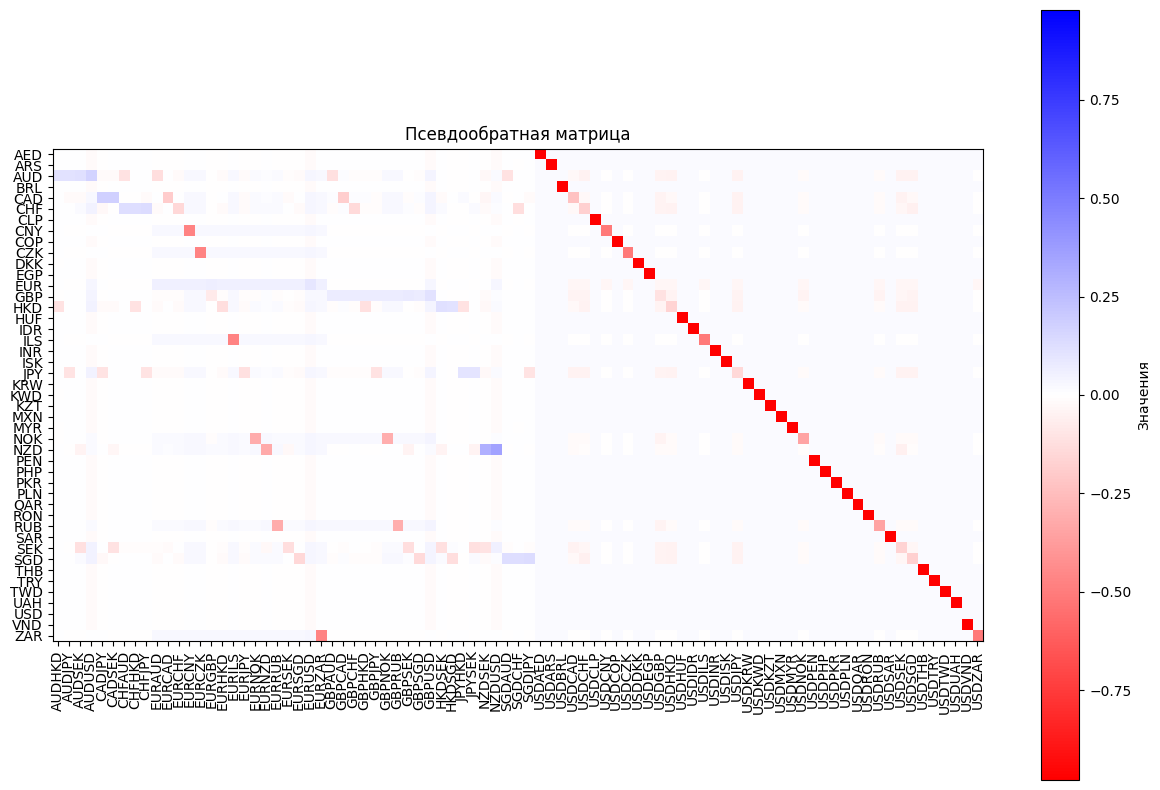

In [21]:
from matplotlib.colors import LinearSegmentedColormap

# Создание пользовательской цветовой карты от красного через белый к синему
colors = ['red', 'white', 'blue']
cmap = LinearSegmentedColormap.from_list('red_white_blue', colors)

# Отображение псевдообратной матрицы
plt.figure(figsize=(15, 10))
plt.imshow(M_pseudo_inverse, cmap=cmap, interpolation='none', vmin=-np.max(np.abs(M_pseudo_inverse)), vmax=np.max(np.abs(M_pseudo_inverse)))
plt.xticks(np.arange(len(pairs)), pairs, rotation=90)  # Поменяли местами подписи осей
plt.yticks(np.arange(len(curs)), curs)
plt.colorbar(label='Значения')  # Добавляем метку на colorbar
plt.title('Псевдообратная матрица')
plt.show()

## *Расчет абсолютных валютных курсов методом наименьших квадратов*

Ключевой этап проекта "Абсолютные валютные курсы" - вычисление внутренней стоимости каждой из 45 ведущих мировых валют. Для этого используется метод наименьших квадратов, который позволяет найти оптимальные абсолютные курсы, наилучшим образом соответствующие имеющимся данным по 85 валютным парам.

Алгоритм расчета абсолютных курсов:

- Для каждого дня в историческом наборе данных формируется система линейных уравнений, связывающих абсолютные курсы валют с наблюдаемыми парными котировками.
- Применяя метод наименьших квадратов, решается эта система уравнений, в результате чего определяются абсолютные курсы 45 валют на данный день.
- Процесс повторяется для всех дней в наборе данных, формируя полную временную серию абсолютных валютных курсов.

Для наглядного представления динамики абсолютных валютных курсов на странице блога проекта по ссылке https://www.abscur.ru/p/2.html размещены интерактивные графики. Это позволяет пользователям визуально анализировать поведение различных национальных денежных единиц во времени.

In [22]:
abscur = pd.DataFrame(columns=curs,index=pd.to_datetime(pairs_close.index), dtype='float64')
for i in range(pairs_close.shape[0]):
    lnA, _, _, _ = np.linalg.lstsq(M, np.log(pairs_close.iloc[i,:].values), rcond=None)
    abscur.iloc[i,:] = np.exp(lnA)

# сохранем на диск
abscur.to_csv("abscur.csv")

upload_dataframe_to_yandex(abscur, 'abscur')

# # передаем в книгу на Google Drive
# post_df_to_ssh("Абсолютные валютные курсы",abscur)

abscur

Файл abscur.xlsx успешно загружен на Яндекс Диск


,AED,ARS,AUD,BRL,CAD,CHF,CLP,CNY,COP,CZK,...,SAR,SEK,SGD,THB,TRY,TWD,UAH,USD,VND,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-30,3.903763,1.685299,10.760414,5.603174,12.670028,15.406192,0.024458,1.814817,0.006831,0.646754,...,3.821975,1.643406,11.274728,0.437417,6.325167,0.439306,0.990879,14.338521,0.000674,1.277554
2006-03-31,3.903681,1.685263,10.760477,5.603056,12.670102,15.406282,0.024458,1.815712,0.006831,0.646758,...,3.821894,1.643416,11.274793,0.437408,6.325034,0.439297,0.990859,14.338219,0.000674,1.277563
2006-04-03,3.903712,1.685277,10.760453,5.603101,12.670073,15.406247,0.024458,1.815368,0.006831,0.646757,...,3.821925,1.643412,11.274768,0.437411,6.325085,0.439301,0.990867,14.338336,0.000674,1.277560
2006-04-04,3.903671,1.685259,10.760484,5.603042,12.670110,15.406292,0.024457,1.815815,0.006831,0.646759,...,3.821885,1.643417,11.274801,0.437406,6.325019,0.439296,0.990856,14.338184,0.000674,1.277564
2006-04-05,3.903607,1.685231,10.760533,5.602950,12.670168,15.406362,0.024457,1.816516,0.006831,0.646762,...,3.821822,1.643424,11.274852,0.437399,6.324914,0.439289,0.990840,14.337948,0.000674,1.277571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-17,6.037475,0.016011,14.397123,4.161201,15.780667,27.865454,0.024031,3.119885,0.005905,1.064189,...,5.913187,2.342983,17.019803,0.684204,0.525217,0.711354,0.527011,22.175041,0.000842,1.292157
2025-11-18,6.039308,0.015877,14.431230,4.167869,15.858402,27.746148,0.023811,3.120534,0.005961,1.062869,...,5.914818,2.342708,17.040731,0.685432,0.523886,0.713133,0.526993,22.180567,0.000841,1.291710
2025-11-19,6.053214,0.015809,14.397654,4.169931,15.820002,27.601383,0.023831,3.125153,0.005979,1.061624,...,5.926991,2.330492,17.010328,0.685396,0.525458,0.712668,0.528112,22.227403,0.000843,1.293465


In [23]:
# Сбрасываем индекс
abscur_reset = abscur.reset_index()

# Преобразуем все datetime столбцы в строки
for col in abscur_reset.columns:
    if pd.api.types.is_datetime64_any_dtype(abscur_reset[col]):
        abscur_reset[col] = abscur_reset[col].dt.strftime('%Y-%m-%d')

upload_dataframe_to_sheet(abscur_reset, "Абсолютные валютные курсы")

✅ DataFrame успешно загружен в лист 'Абсолютные валютные курсы'
📊 Размер данных: 5904 строк × 46 столбцов


True

Полученная таблица представляет собой результат расчета абсолютных валютных курсов для 45 ведущих мировых валют на основе исторических данных по 85 валютным парам. Она содержит временную серию абсолютных курсов.

Каждая строка соответствует определенной дате, а столбцы отражают абсолютные курсы для 45 валют, включая такие известные, как доллар США (USD), евро (EUR), британский фунт (GBP), японская иена (JPY) и китайский юань (CNY), а также менее распространенные, например, южноафриканский рэнд (ZAR), индийская рупия (INR) и российский рубль (RUB).

# Ошибка восстановления пар

А теперь попробуем обратно восстановить валютные пары из абсолютных курсов и посмотреть на погрешность.

In [24]:
pairs_delta = pairs_close.copy()
for pair in pairs_delta.columns:
    abs1, abs2 = pair[:3], pair[3:]
    pairs_delta[pair] = (pairs_close[pair].values - abscur[abs1].values / abscur[abs2].values) / pairs_close[pair].values
    

# сохранем на диск
pairs_delta.to_csv("pairs_delta.csv")

upload_dataframe_to_yandex(pairs_delta, 'pairs_delta')

# # передаем в книгу на Google Drive
# post_df_to_ssh("Относительная ошибка восстановления пары",pairs_delta)
    
pairs_delta

Файл pairs_delta.xlsx успешно загружен на Яндекс Диск


Валютные пары,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-30,-0.009148,-0.000321,0.074240,-0.000740,-0.070098,0.014710,0.102443,7.921769e-02,1.332812e-01,0.020327,...,-0.071081,1.420479e-15,-0.181001,1.950504e-01,2.384372e-15,3.330326e-15,4.789344e-15,6.137856e-16,8.551901e-16,0.002806
2006-03-31,-0.009148,-0.000321,0.074240,-0.000767,-0.070098,0.014711,0.102443,7.921770e-02,1.332812e-01,0.020299,...,-0.071052,2.840959e-15,-0.180969,1.950720e-01,2.167611e-15,2.742622e-15,1.088487e-15,2.455142e-15,-1.368304e-15,0.002834
2006-04-03,-0.009148,-0.000321,0.074240,-0.000757,-0.070098,0.014710,0.102443,7.921770e-02,1.332812e-01,0.020310,...,-0.071063,7.102397e-16,-0.180981,1.950637e-01,4.335221e-16,1.959015e-15,0.000000e+00,1.227571e-16,3.933875e-15,0.002823
2006-04-04,-0.009148,-0.000321,0.074240,-0.000770,-0.070098,0.014711,0.102443,7.921770e-02,1.332812e-01,0.020296,...,-0.071049,4.024692e-15,-0.180965,1.950745e-01,4.118460e-15,6.072948e-15,4.789344e-15,2.700657e-15,-5.131141e-16,0.002837
2006-04-05,-0.009148,-0.000321,0.074241,-0.000791,-0.070098,0.014711,0.102443,7.921771e-02,1.332812e-01,0.020274,...,-0.071026,4.261438e-15,-0.180940,1.950914e-01,4.118460e-15,4.113932e-15,5.007042e-15,2.577899e-15,3.420761e-15,0.002859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-17,-0.000063,-0.000062,-0.000070,-0.000075,0.000015,0.000008,0.000063,-2.775750e-07,3.170128e-07,-0.000474,...,-0.000015,3.078936e-15,0.000006,2.746681e-06,3.727006e-15,3.029265e-15,4.558706e-15,4.390549e-15,-1.795851e-15,-0.000027
2025-11-18,-0.000049,-0.000050,-0.000040,-0.000038,0.000034,0.000044,0.000049,1.987651e-06,2.082082e-06,-0.000288,...,-0.000038,3.552714e-15,-0.000002,-1.584441e-05,6.148083e-15,5.034728e-15,7.310345e-15,6.077502e-15,-9.654201e-16,-0.000074
2025-11-19,-0.000058,-0.000079,-0.000061,-0.000067,0.000001,0.000019,0.000065,8.470368e-06,-1.173519e-05,-0.000432,...,-0.000022,3.789359e-15,0.000006,-2.887288e-07,5.477511e-15,3.023515e-15,3.986822e-15,4.895824e-15,1.793059e-15,-0.000052


In [25]:
# Сбрасываем индекс
pairs_delta_reset = pairs_delta.reset_index()

# Преобразуем все datetime столбцы в строки
for col in pairs_delta_reset.columns:
    if pd.api.types.is_datetime64_any_dtype(pairs_delta_reset[col]):
        pairs_delta_reset[col] = pairs_delta_reset[col].dt.strftime('%Y-%m-%d')

upload_dataframe_to_sheet(pairs_delta_reset, "Ошибки восстановления парных курсов")

✅ DataFrame успешно загружен в лист 'Ошибки восстановления парных курсов'
📊 Размер данных: 5904 строк × 86 столбцов


True

In [26]:
pairs_delta_stat = pairs_delta.describe().T

# сохранем на диск
pairs_delta_stat.to_csv("pairs_delta_stat.csv")

upload_dataframe_to_yandex(pairs_delta_stat, 'pairs_delta_stat')

# # передаем в книгу на Google Drive
# post_df_to_ssh("Статистика ошибки восстановления пар",pairs_delta_stat)

pairs_delta_stat

Файл pairs_delta_stat.xlsx успешно загружен на Яндекс Диск


,count,mean,std,min,25%,50%,75%,max
Валютные пары,,,,,,,,
AUDHKD,5904.0,-2.082194e-02,3.066857e-02,-9.952808e-02,-4.448406e-02,-9.148370e-03,-2.805623e-05,5.232956e-02
AUDJPY,5904.0,3.428931e-04,1.878400e-02,-4.565250e-02,-1.036391e-02,-4.827820e-05,9.769229e-03,8.198274e-02
AUDSEK,5904.0,2.805648e-02,2.165594e-02,-9.641154e-03,8.896590e-03,2.832298e-02,3.934492e-02,1.002977e-01
AUDUSD,5904.0,3.458912e-02,5.476823e-02,-1.658484e-01,-1.451116e-03,1.993465e-02,7.160549e-02,1.675563e-01
CADJPY,5904.0,-9.108209e-03,2.856282e-02,-1.257432e-01,-2.329480e-02,-6.421985e-05,9.794358e-03,4.407309e-02
...,...,...,...,...,...,...,...,...
USDTRY,5904.0,3.452853e-15,1.856374e-15,-2.856859e-15,2.154917e-15,3.486745e-15,4.701637e-15,1.107716e-14
USDTWD,5904.0,3.261922e-15,1.716714e-15,-2.424481e-15,2.102648e-15,3.270221e-15,4.437055e-15,1.043892e-14
USDUAH,5904.0,2.800933e-15,1.675208e-15,-3.327361e-15,1.639763e-15,2.794137e-15,3.928228e-15,8.821246e-15


In [27]:
# Сбрасываем индекс и преобразуем данные в правильный формат
pairs_delta_stat_reset = pairs_delta_stat.reset_index()

# Преобразуем все datetime столбцы в строки если они есть
for col in pairs_delta_stat_reset.columns:
    if pd.api.types.is_datetime64_any_dtype(pairs_delta_stat_reset[col]):
        pairs_delta_stat_reset[col] = pairs_delta_stat_reset[col].dt.strftime('%Y-%m-%d')

# Записываем таблицу на лист "Статистики ошибок восстановления пар"
upload_dataframe_to_sheet(pairs_delta_stat_reset, "Статистики ошибок восстановления пар")

✅ DataFrame успешно загружен в лист 'Статистики ошибок восстановления пар'
📊 Размер данных: 85 строк × 9 столбцов


True

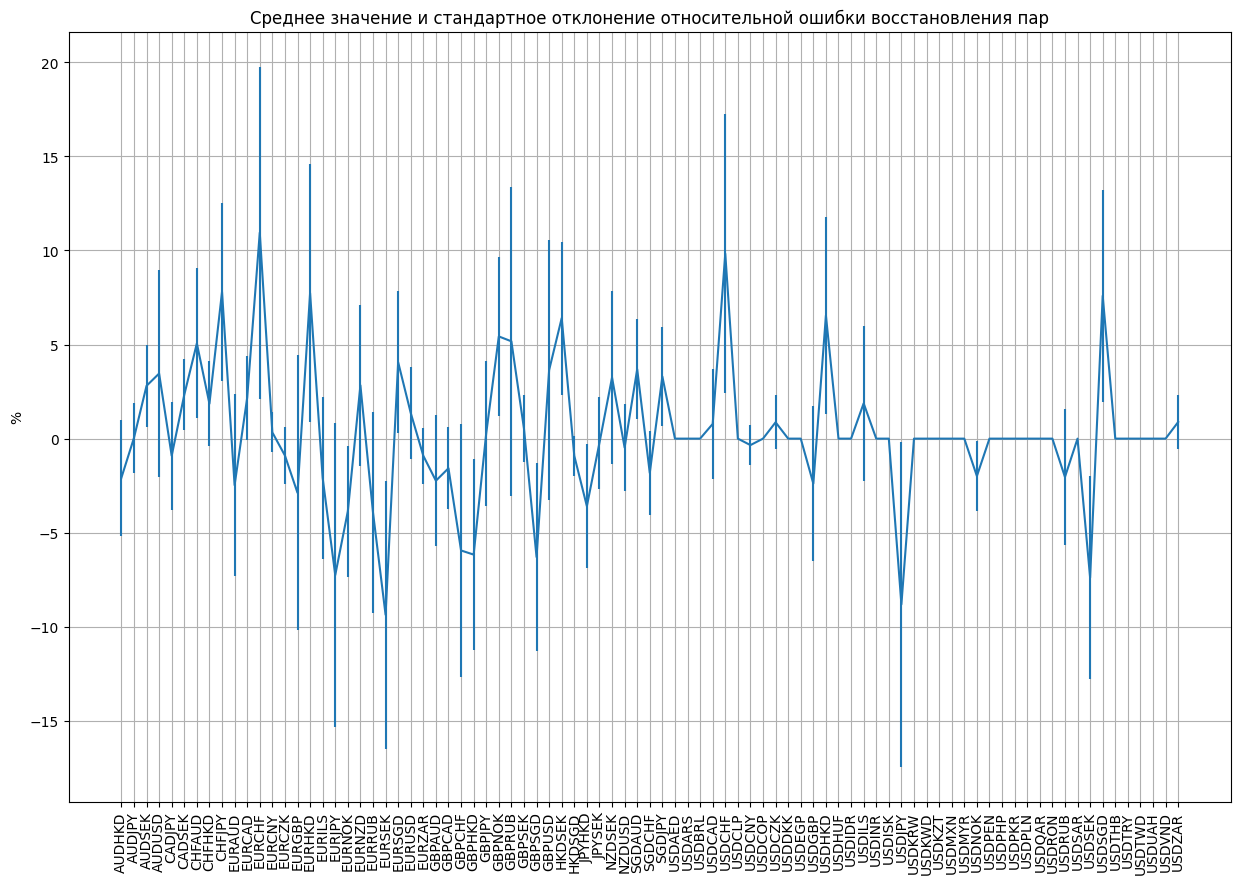

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
# bars = ax.bar(pairs_delta_stat.index, pairs_delta_stat['mean']*100, label='Mean')
plt.title("Среднее значение и стандартное отклонение относительной ошибки восстановления пар")
plt.ylabel('%')

ax.errorbar(pairs_delta_stat.index,pairs_delta_stat['mean']*100,pairs_delta_stat['std']*100)

# for i, pair in enumerate(pairs_delta_stat.index):
#     ax.errorbar(pair, pairs_delta_stat.loc[pair, 'mean']*100, yerr=pairs_delta_stat.loc[pair, 'std'], color='black', fmt='_', capsize=5, capthick=2)


ax.set_xticks(np.arange(len(pairs_delta_stat.index)))
ax.set_xticklabels(pairs_delta_stat.index, rotation=90)
ax.grid()


# Последние абсолютные валютные курсы

Собирается таблица с последними абсолютными валютными курсами закрытий всех имеющихся 45 валют, которая сохраняется в тетрадке под именем `abs_last.csv`. Все сохраненные в тетрадке файлы доступны для скачивания без ограничений. 

Таблицы последних абсолютных валютных курсов в интерактивном режиме можно посмотреть в блоге по адресу https://www.abscur.ru/p/blog-page_59.html.

In [29]:
abscur_last = abscur.iloc[[-1],:].T
abscur_last.index.name = "Валюты"
abscur_last.columns = ['Курс на ' + str(abscur_last.columns[0])[:10]]

# сохранем на диск
abscur_last.to_csv("abscur_last.csv")

upload_dataframe_to_yandex(abscur_last, 'abscur_last')

# # передаем в книгу на Google Drive
# post_df_to_ssh("Последние абсолютные валютные курсы",abscur_last)

abscur_last

Файл abscur_last.xlsx успешно загружен на Яндекс Диск


,Курс на 2025-11-21
Валюты,
AED,6.066443
ARS,0.015641
AUD,14.381230
BRL,4.123829
CAD,15.798369
CHF,27.562256
CLP,0.023762
CNY,3.135212
COP,0.005863


In [30]:
# Сбрасываем индекс и преобразуем данные в правильный формат
abscur_last_reset = abscur_last.reset_index()

# Преобразуем все datetime столбцы в строки если они есть
for col in abscur_last_reset.columns:
    if pd.api.types.is_datetime64_any_dtype(abscur_last_reset[col]):
        abscur_last_reset[col] = abscur_last_reset[col].dt.strftime('%Y-%m-%d')

# Записываем таблицу на лист "Последние абсолютные валютные курсы"
upload_dataframe_to_sheet(abscur_last_reset, "Последние абсолютные валютные курсы")

✅ DataFrame успешно загружен в лист 'Последние абсолютные валютные курсы'
📊 Размер данных: 45 строк × 2 столбцов


True

# Задаем диапазоны

In [31]:
fmt = """30	за месяц	1m
90	за квартал	1kv
180	за полгода	6m
365	за год	1y
730	за два года	2y
1095	за три года	3y
1825	за пять лет	5y
18250	за все время	all"""
fmt_diap = np.array([ln.split("\t") for ln in fmt.split("\n")])
fmt_diap

array([['30', 'за месяц', '1m'],
       ['90', 'за квартал', '1kv'],
       ['180', 'за полгода', '6m'],
       ['365', 'за год', '1y'],
       ['730', 'за два года', '2y'],
       ['1095', 'за три года', '3y'],
       ['1825', 'за пять лет', '5y'],
       ['18250', 'за все время', 'all']], dtype='<U12')

# Рейтинг абсолютной доходности валют

Доходности всех валют за разные периоды рассчитываются и складываются в файл `reit_doh.csv`.

Доходность считаем по формуле:

$$
Doh = (\sum_{n=1}^{N}{\frac{\Delta X_n}{X_n}}+1)^{252}-1
$$

, где $X_n$ - значение в диапазоне для курса валюты, $\Delta X_n$ - изменение значения в диапазоне для курса валюты. Возведением в степень 252 нормируем к году. 

Посмотреть результаты удобнее всего будет на сайте (см. https://www.abscur.ru/p/blog-page_3.html).

In [32]:
reit_doh = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)
for i in range(fmt_diap.shape[0]):
    df = abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
#     reit_doh.iloc[:,i] = (df.iloc[-1,:] - df.iloc[0,:]) / df.iloc[0,:]
    reit_doh.iloc[:,i] = np.power(df.pct_change().mean().values+1,252)-1

reit_doh.index.name = "Валюта"
    
# сохранем на диск
reit_doh.to_csv("reit_doh.csv")

upload_dataframe_to_yandex(reit_doh, 'reit_doh')

# # передаем в книгу на Google Drive
# post_df_to_ssh("Рейтинг абсолютной доходности",reit_doh)

reit_doh

Файл reit_doh.xlsx успешно загружен на Яндекс Диск


,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.028868,0.018999,0.011772,-0.022402,0.015950,0.016691,0.031378,0.019500
ARS,0.746944,-0.130438,-0.333430,-0.246490,-0.330696,-0.354480,-0.294976,-0.167139
AUD,-0.024778,0.003810,0.001671,-0.029542,0.011646,0.009844,0.013293,0.013400
BRL,0.025751,0.028290,0.104119,0.040730,-0.015922,0.018548,0.036479,-0.007999
CAD,-0.057278,-0.048606,-0.038626,-0.031363,0.004359,0.006145,0.013641,0.010143
CHF,-0.139031,0.007054,0.041381,0.051419,0.050588,0.055535,0.043438,0.025945
CLP,0.205397,0.135858,0.018079,0.008399,-0.007846,0.017707,0.006503,0.001675
CNY,0.062121,0.045317,0.030819,-0.009955,0.017927,0.017159,0.019519,0.024300
COP,0.418303,0.282137,0.199746,0.099124,0.045071,0.085842,0.029413,-0.002748


# Рейтинг абсолютной волатильности валют

Волатильности всех валют за разные периоды рассчитываются и складываются в файл `reit_vol.csv`.

Сначала посчитаем относительные изменения абсолютных курсов по следующей формуле:
$$
X^{'}_k = \frac{X_k-X_{k-1}}{X_{k-1}}
$$

Волатильность считаем по формуле:

$$
Vol = {std(X^{'})}\times{\sqrt{252}}
$$

, где $std(X^{'})$ - стандартное отклонение для относительных изменений абсолютных курсов валюты за некоторый период. Домножением на $\sqrt{252}$ нормируем к году.

Посмотреть результаты удобнее всего будет на сайте (см. https://www.abscur.ru/p/blog-page_26.html).

In [33]:
reit_vol = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)

for i in range(fmt_diap.shape[0]):
    df = abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    reit_vol.iloc[:,i] = df.pct_change().std() * np.sqrt(252)

reit_vol.index.name = "Валюта"
    
# сохранем на диск
reit_vol.to_csv("reit_vol.csv")

upload_dataframe_to_yandex(reit_vol, 'reit_vol')

# # передаем в книгу на Google Drive
# post_df_to_ssh("Рейтинг абсолютной волатильности",reit_vol)

reit_vol

Файл reit_vol.xlsx успешно загружен на Яндекс Диск


,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,0.024077,0.027478,0.033848,0.036588,0.034339,0.035211,0.037638,0.031420
ARS,0.244248,0.271420,0.219339,0.193245,0.353577,0.298952,0.234891,0.159159
AUD,0.049271,0.050727,0.047887,0.064292,0.058934,0.060087,0.050626,0.043090
BRL,0.063760,0.081021,0.087985,0.101459,0.092922,0.093668,0.112410,0.100525
CAD,0.031523,0.032677,0.033060,0.037865,0.035515,0.036682,0.033717,0.036650
CHF,0.049247,0.050328,0.050842,0.063576,0.056577,0.052526,0.044066,0.039651
CLP,0.076144,0.070989,0.075634,0.079222,0.088972,0.096292,0.112059,0.076297
CNY,0.018351,0.022194,0.028471,0.036330,0.032598,0.034286,0.037030,0.036609
COP,0.109460,0.092170,0.093113,0.090224,0.089530,0.100553,0.104514,0.086841


# Рейтинг валют по коэффициенту Шарпа

Коэффициенты Шарпа для всех валют за разные периоды рассчитываются и складываются в файл `reit_sharp.csv`.

Сначала посчитаем относительные изменения абсолютных курсов по следующей формуле:
$$
X^{'}_k = \frac{X_k-X_{k-1}}{X_{k-1}}
$$

Коэффициенты Шарпа считаем по такой формуле:

$$
koefSharp = \frac{mean(X^{'})}{std(X^{'})}\times{\sqrt{252}}
$$

, где $std(X^{'})$ - стандартное отклонение для относительных изменений абсолютных курсов валюты за некоторый период, $mean(X^{'})$ - среднее значения для относительных изменений абсолютных курсов валюты за некоторый период. Результат нормируем к году домножив на $\sqrt{252}$.

Посмотреть результаты удобнее всего будет на сайте (см. https://www.abscur.ru/p/blog-page_6.html).

In [34]:
reit_sharp = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)
d_abscur = abscur.pct_change()

for i in range(fmt_diap.shape[0]):
    df = d_abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    reit_sharp.iloc[:,i] = df.mean() / df.std() * np.sqrt(252)

reit_sharp.index.name = "Валюта"
    
# сохранем на диск
reit_sharp.to_csv("reit_sharp.csv")

upload_dataframe_to_yandex(reit_sharp, 'reit_sharp')

# # передаем в книгу на Google Drive
# post_df_to_ssh("Рейтинг валют по коэффициенту Шарпа",reit_sharp)

reit_sharp

Файл reit_sharp.xlsx успешно загружен на Яндекс Диск


,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
Валюта,,,,,,,,
AED,1.271832,1.182140,0.344421,-0.581135,0.483216,0.444378,0.820632,0.614670
ARS,2.301477,-0.827413,-1.840760,-1.458200,-1.133011,-1.471322,-1.486570,-1.148677
AUD,-0.515889,0.279024,0.007450,-0.430462,0.197774,0.169480,0.260874,0.308910
BRL,0.001296,0.615003,1.121709,0.355840,-0.165534,0.161451,0.318653,-0.079890
CAD,-1.072529,-1.325849,-1.169691,-0.796042,0.155574,0.178948,0.401885,0.275359
CHF,-2.842257,0.005857,0.793883,0.777324,0.884390,1.036615,0.964870,0.646026
CLP,2.891174,1.647473,0.236008,0.118144,-0.095324,0.214972,0.057805,0.021940
CNY,3.103866,2.678965,1.062174,-0.213913,0.544102,0.493511,0.521925,0.655859
COP,2.673149,2.736320,1.949069,1.061445,0.504155,0.831489,0.277281,-0.031690


# Сохранение истории данных

In [35]:
# ! cp -rf /kaggle/input/abscur2/history .
# ! rm -r history/$(date +'%Y-%m-%d')
# ! mkdir -p history/$(date +'%Y-%m-%d')
# ! cp *.csv history/$(date +'%Y-%m-%d')
# ! cp -r ./pairs history/$(date +'%Y-%m-%d')

# Лучшие валютные портфели

В разделе "Лучшие валютные портфели по коэффициенту Шарпа" представлена информация о лучших валютных портфелях, оптимизированных с учетом коэффициента Шарпа. 

Таблица на странице содержит доли каждой валюты в этих портфелях за разные временные диапазоны. Доли валют вычисляются математической оптимизацией для повышения коэффициента Шарпа портфеля, используя абсолютные валютные курсы. Такой подход позволяет сравнивать и оптимизировать портфели на основе общего знаменателя, что невозможно при использовании парных валютных курсов.

Дополнительно, представлена таблица со статистикой по лучшим портфелям, включающая коэффициент Шарпа (приведенный к году), годовую доходность и волатильность. Эти показатели помогают оценить эффективность и риски портфелей. График ниже демонстрирует развитие лучших портфелей в процентах со старта на 100%, позволяя визуально отслеживать их динамику во времени.

Посмотреть результаты удобнее всего будет на сайте (см. https://www.abscur.ru/p/blog-page_8.html).

In [36]:
# from scipy.optimize import minimize

# def softmax(x):
#     exp_x = np.exp(x - np.max(x))  
#     return exp_x / exp_x.sum(axis=0, keepdims=True)

# # parts = softmax(np.random.randn(df.shape[1]))
# # parts

# def calc_portf(d_cot,parts):
#     portf = d_cot.copy() + 1
#     portf[0,:] = first_line = portf[0,:] * parts
#     portf = portf.cumprod(axis=0).sum(axis=1)
#     return portf

# # calc_portf(df_values,parts)

# def calculate_sharpe_ratio(weights, returns):
#     portf = pd.Series(calc_portf(returns,weights)).pct_change()
#     portfolio_return = portf.mean()
#     portfolio_std = portf.std()
#     sharpe_ratio = portfolio_return / portfolio_std * np.sqrt(252)
#     return sharpe_ratio

# # calculate_sharpe_ratio(parts, df_values)

# def get_best_parts(d_cot,initial_parts=None):
    
#     def optim_function(p_parts):
#         parts = softmax(p_parts)
#         result = -calculate_sharpe_ratio(parts, d_cot) 
#         return result
    
#     if initial_parts is None:
#         initial_parts = np.ones(d_cot.shape[1])
    
#     result = minimize(optim_function, softmax(initial_parts))
    
#     return softmax(result.x)

# # best_parts = get_best_parts(df_values)
# # best_parts

# best_portf_parts = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)

# best_portf_stats = pd.DataFrame(
#     columns=fmt_diap[:,1],
#     index=["коэффициент Шарпа (приведенный к году)",
#            "доходность годовая, %", 
#            "волатильность годовая, %"],
#     dtype=str)

# best_portf_hist = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.index,dtype=float)

# for i in range(fmt_diap.shape[0]):
#     df = d_abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
#     df_values = df.fillna(0).values
#     best_parts = get_best_parts(df_values)
#     best_portf = calc_portf(df_values,best_parts)
#     best_portf_parts.iloc[:,i] = best_parts
    
#     best_portf_hist.iloc[-len(best_portf):,i] = best_portf
    
#     d_portf = pd.Series(best_portf).pct_change()
#     portfolio_return = d_portf.mean()
#     portfolio_std = d_portf.std()
#     sharpe_ratio_portf = f"{np.round(portfolio_return / portfolio_std * np.sqrt(252),2)}".replace('.',',')
#     doh_portf = f"{np.round((np.power(portfolio_return+1,252)-1)*100,2)}%".replace('.',',')
#     vol_portf = f"{np.round(portfolio_std * np.sqrt(252)*100,2)}%".replace('.',',')
#     portf_stats = [sharpe_ratio_portf,doh_portf,vol_portf]
#     best_portf_stats.iloc[:,i] = portf_stats
    
    
# #     break

# best_portf_parts.index.name = "Валюта"
# best_portf_stats.index.name = "Статистика"
# best_portf_hist.index.name = "Дата"
    
# # сохранем на диск
# best_portf_parts.to_csv("best_portf_parts.csv")
# best_portf_stats.to_csv("best_portf_stats.csv")
# best_portf_hist.to_csv("best_portf_hist.csv")

# # передаем в книгу на Google Drive
# # _ = post_df_to_ssh("Доли лучших портфелей по Шарпу",best_portf_parts)
# # _ = post_df_to_ssh("Статистики лучших портфелей по Шарпу",best_portf_stats)
# # _ = post_df_to_ssh("История лучших портфелей по Шарпу",best_portf_hist)

## Доли лучших портфелей

In [37]:
# best_portf_parts

## Статистики лучших портфелей

In [38]:
# best_portf_stats

## Графики истории лучших портфелей

In [39]:
# _ = (best_portf_hist*100).plot(
#     figsize=(15,5),
#     title="Графики истории лучших портфелей",
#     grid=True,
#     ylabel="%"
# )

# Диапазоны

In [40]:
import pandas as pd

# Получение сегодняшней даты и вычисление дат в прошлом
today = pd.Timestamp.now().normalize()

month_ago = today - pd.DateOffset(months=1)
quarter_ago = today - pd.DateOffset(months=3)
year_ago = today - pd.DateOffset(years=1)
three_years_ago = today - pd.DateOffset(years=3)
five_years_ago = today - pd.DateOffset(years=5)
ten_years_ago = today - pd.DateOffset(years=10)

# Создание списка диапазонов и их расшифровок
date_ranges = [
    [month_ago, today, "месяц","1m"],
    [quarter_ago, today, "квартал","1q"],
    [year_ago, today, "год","1y"],
    [three_years_ago, today, "три года","3y"],
    [five_years_ago, today, "пять лет","5y"],
    [ten_years_ago, today, "десять лет","10y"]
]

ago_dates = {item[2] : item[0] for item in date_ranges}
period_suffix = {item[2] : item[3] for item in date_ranges}

In [41]:
# Создаем DataFrame с диапазонами дат
df_date_ranges = pd.DataFrame(date_ranges, columns=['Начало', 'Конец', 'Период_рус', 'Период_код'])

# Преобразуем столбцы с датами в строки
df_date_ranges['Начало'] = df_date_ranges['Начало'].dt.strftime('%Y-%m-%d')
df_date_ranges['Конец'] = df_date_ranges['Конец'].dt.strftime('%Y-%m-%d')

# Сохраняем в Google Таблицы на лист "Диапазоны"
upload_dataframe_to_sheet(df_date_ranges, "Диапазоны")

✅ DataFrame успешно загружен в лист 'Диапазоны'
📊 Размер данных: 6 строк × 4 столбцов


True

# Абсолютные валютные курсы

## Подготовка абсолютных курсов

In [42]:
import pandas as pd

all_abscur = pd.read_csv("/kaggle/input/abscur2/abscur.csv",index_col='Date')
all_abscur.index = pd.to_datetime(all_abscur.index)

all_pairs = pd.read_csv('/kaggle/input/abscur2/pairs_close.csv',index_col='Date')
all_pairs.index = pd.to_datetime(all_pairs.index)

# Формируем словарь для расшифровок валют
cur_descr = """AED	Дирхам ОАЭ	https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%80%D1%85%D0%B0%D0%BC_%D0%9E%D0%90%D0%AD
ARS	Аргентинское песо	https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE
AUD	Австралийский доллар	https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%81%D1%82%D1%80%D0%B0%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
BRL	Бразильский реал	https://ru.wikipedia.org/wiki/%D0%91%D1%80%D0%B0%D0%B7%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B5%D0%B0%D0%BB
CAD	Канадский доллар	https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%BD%D0%B0%D0%B4%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
CHF	Швейцарский франк	https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA
CLP	Чилийское песо	https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE
CNY	Китайский юань	https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D1%82%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%8E%D0%B0%D0%BD%D1%8C
COP	Колумбийское песо	https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE
CZK	Чешская крона	https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D1%88%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0
DKK	Датская крона	https://ru.wikipedia.org/wiki/%D0%94%D0%B0%D1%82%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0
EGP	Египетский фунт	https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82
EUR	Евро	https://ru.wikipedia.org/wiki/%D0%95%D0%B2%D1%80%D0%BE
GBP	Фунт стерлингов	https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D1%82_%D1%81%D1%82%D0%B5%D1%80%D0%BB%D0%B8%D0%BD%D0%B3%D0%BE%D0%B2
HKD	Гонконгский доллар	https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BD%D0%BA%D0%BE%D0%BD%D0%B3%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
HUF	Венгерский форинт	https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%B8%D0%BD%D1%82
IDR	Индонезийская рупия	https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%BE%D0%BD%D0%B5%D0%B7%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F
ILS	Новый израильский шекель	https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B8%D0%B7%D1%80%D0%B0%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%88%D0%B5%D0%BA%D0%B5%D0%BB%D1%8C
INR	Индийская рупия	https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F
ISK	Исландская крона	https://ru.wikipedia.org/wiki/%D0%98%D1%81%D0%BB%D0%B0%D0%BD%D0%B4%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0
JPY	Японская иена	https://ru.wikipedia.org/wiki/%D0%98%D0%B5%D0%BD%D0%B0
KRW	Южнокорейская вона	https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%BA%D0%BE%D1%80%D0%B5%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D0%B2%D0%BE%D0%BD%D0%B0
KWD	Кувейтский динар	https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B2%D0%B5%D0%B9%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B8%D0%BD%D0%B0%D1%80
KZT	Казахстанский тенге	https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%B7%D0%B0%D1%85%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%82%D0%B5%D0%BD%D0%B3%D0%B5
MXN	Мексиканское песо	https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE
MYR	Малайзийский ринггит	https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%BB%D0%B0%D0%B9%D0%B7%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%BD%D0%B3%D0%B3%D0%B8%D1%82
NOK	Норвежская крона	https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%B2%D0%B5%D0%B6%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0
NZD	Новозеландский доллар	https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D0%BE%D0%B7%D0%B5%D0%BB%D0%B0%D0%BD%D0%B4%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
PEN	Перуанский новый соль	https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%83%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%BD%D0%BE%D0%B2%D1%8B%D0%B9_%D1%81%D0%BE%D0%BB%D1%8C
PHP	Филиппинское песо	https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D0%B8%D0%BF%D0%BF%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE
PKR	Пакистанская рупия	https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F
PLN	Польский злотый	https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B7%D0%BB%D0%BE%D1%82%D1%8B%D0%B9
QAR	Катарский риал	https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%B0%D0%BB
RON	Румынский лей	https://ru.wikipedia.org/wiki/%D0%A0%D1%83%D0%BC%D1%8B%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%BB%D0%B5%D0%B9
RUB	Российский рубль	https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C
SAR	Саудовский риял	https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D1%83%D0%B4%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D1%8F%D0%BB
SEK	Шведская крона	https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0
SGD	Сингапурский доллар	https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
THB	Тайский бат	https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B1%D0%B0%D1%82
TRY	Турецкая лира	https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0
TWD	Новый тайваньский доллар	https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D1%82%D0%B0%D0%B9%D0%B2%D0%B0%D0%BD%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80
UAH	Украинская гривна	https://ru.wikipedia.org/wiki/%D0%A3%D0%BA%D1%80%D0%B0%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D0%B3%D1%80%D0%B8%D0%B2%D0%BD%D0%B0
USD	Доллар США	https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%BB%D0%BB%D0%B0%D1%80_%D0%A1%D0%A8%D0%90
VND	Вьетнамский донг	https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%BD%D0%B3
ZAR	Южноафриканский рэнд	https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%B0%D1%84%D1%80%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%8D%D0%BD%D0%B4"""
cur_descr = [item.split('\t') for item in cur_descr.split('\n')]

cur_name = {item[0]: item[1] for item in cur_descr}
cur_wiki = {item[0]: item[2] for item in cur_descr}

cur_descr = {item[0]: item[1:] for item in cur_descr}

## Последние парные валютные курсы

В данном разделе представлены последние парные валютные курсы с рынка Forex. Таблица отображает тикеры валютных пар и их актуальные курсы на основе последних доступных данных. Каждый тикер является гиперссылкой, которая ведет на страницу с графиком соответствующей валютной пары, что позволяет пользователям легко получить дополнительную информацию о динамике курсов.

Этот раздел предоставляет исследователям и аналитикам возможность быстро ознакомиться с текущими значениями валютных пар, что может быть полезно для анализа финансовых рынков и разработки торговых стратегий.

См. на сайте [https://www.abscur.ru/p/blog-page_52.html](https://www.abscur.ru/p/blog-page_52.html)

## Парные валютные курсы

В данном разделе представлены графики, иллюстрирующие динамику парных валютных курсов, а также абсолютные валютные курсы, составляющие эти пары. Графики отображают как парный валютный курс, так и два абсолютных курса для каждой из валют, входящих в пару.

Парный валютный курс представляет собой отношение абсолютных курсов двух валют. Например, курс валютной пары USDRUB определяется как отношение абсолютного курса доллара США (USD) к абсолютному курсу российского рубля (RUB): USDRUB = USD / RUB.

Абсолютные курсы валют получаются путем математической оптимизации на основе парных валютных курсов и отражают абсолютную ценность каждой валюты по отношению ко всем другим валютам одновременно, а не только к одной конкретной валюте. Это позволяет более точно оценить стоимость каждой валюты в глобальном контексте.

Графики представлены для различных временных диапазонов, начиная от одного месяца и заканчивая десятью годами. Это позволяет исследователям анализировать изменения в курсах как на краткосрочных, так и на долгосрочных интервалах времени.

Данные графики могут быть полезны для глубокого анализа валютных рынков и динамики обменных курсов в рамках финансовых исследований и экономического моделирования.

См. на сайте [https://www.abscur.ru/p/blog-page_54.html](https://www.abscur.ru/p/blog-page_54.html)

## Последние абсолютные валютные курсы Forex 

В данном разделе представлены последние абсолютные валютные курсы различных валют. Таблица отображает тикеры валют, их названия и актуальные курсы на основе последних доступных данных. Каждый тикер и название валюты являются гиперссылками, которые ведут на страницу с графиком соответствующей валюты, что позволяет пользователям легко получить дополнительную информацию о динамике курсов.

Заголовок столбца с курсами включает дату последнего обновления, что обеспечивает актуальность представленных данных. Этот раздел предоставляет исследователям и аналитикам возможность быстро ознакомиться с текущими значениями абсолютных валютных курсов, что может быть полезно для анализа финансовых рынков и разработки торговых стратегий.

См. на сайте [https://www.abscur.ru/p/blog-page_59.html](https://www.abscur.ru/p/blog-page_59.html)

## Графики абсолютных валютных курсов

В данном разделе представлены графики абсолютных валютных курсов, которые отображают динамику ценности каждой валюты по отношению ко всем другим валютам одновременно. Абсолютные курсы получаются путем математической оптимизации на основе парных валютных курсов и позволяют более точно оценить стоимость каждой валюты в глобальном контексте.

Графики представлены для различных временных диапазонов, начиная от одного месяца и заканчивая десятью годами. Это позволяет исследовать изменения в курсах как на краткосрочных, так и на долгосрочных интервалах времени.

Для переключения между валютами можно использовать гиперссылки с тикерами валют. Текущая валюта в списке подсвечена желтым, что облегчает идентификацию выбранной валюты. Данные графики могут быть полезны для глубокого анализа валютных рынков и динамики обменных курсов в рамках финансовых исследований и экономического моделирования.

См. на сайте [https://www.abscur.ru/p/2.html](https://www.abscur.ru/p/2.html)

## Рейтинг стабильности валют

В данном разделе представлены диаграммы, отображающие рейтинги стабильности различных валют на основе коэффициента вариации. Коэффициент вариации позволяет оценить стабильность валют: чем ниже его значение, тем стабильнее валюта.

На диаграммах вы увидите, что лучшие валюты по стабильности расположены в правой части графика. Каждая валюта представлена тикером и названием, а также указано значение коэффициента вариации в процентах. Гиперссылки на соответствующие страницы с графиками валют позволяют легко получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят быстро ознакомиться с текущими значениями стабильности валют и использовать эту информацию для анализа финансовых рынков и разработки торговых стратегий.

См. на сайте [https://www.abscur.ru/p/blog-page.html](https://www.abscur.ru/p/blog-page.html)

In [43]:
# Создаем пустой DataFrame для сводной таблицы
cv_pivot_data = {}

# Проходим по всем временным диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]
    
    # Вычисляем коэффициенты вариации для текущего периода
    cv_values = {}
    for ticker in filtered_data.columns:
        mean = filtered_data[ticker].mean()
        std_dev = filtered_data[ticker].std()
        if mean != 0:
            cv = std_dev / mean * 100
            cv_values[ticker] = cv
    
    # Добавляем в сводную таблицу
    cv_pivot_data[period_name] = cv_values

# Создаем DataFrame из собранных данных
cv_pivot_df = pd.DataFrame(cv_pivot_data)

# Сортируем столбцы по порядку периодов (от короткого к длинному)
period_order = ["месяц", "квартал", "год", "три года", "пять лет", "десять лет"]
cv_pivot_df = cv_pivot_df[period_order]

# Добавляем столбец с названиями валют
cv_pivot_df['Currency Name'] = cv_pivot_df.index.map(cur_name)

# Переупорядочиваем столбцы, чтобы названия валют были первыми
column_order = ['Currency Name'] + period_order
cv_pivot_df = cv_pivot_df[column_order]

# Сбрасываем индекс, чтобы тикеры стали отдельным столбцом
cv_pivot_df = cv_pivot_df.reset_index().rename(columns={'index': 'Ticker'})

# Сортируем по тикеру для удобства
cv_pivot_df = cv_pivot_df.sort_values('Ticker').reset_index(drop=True)

print("Сводная таблица коэффициентов вариации создана:")
cv_pivot_df

Сводная таблица коэффициентов вариации создана:


,Ticker,Currency Name,месяц,квартал,год,три года,пять лет,десять лет
0,AED,Дирхам ОАЭ,0.240328,0.313173,1.919800,3.560533,8.127375,11.965773
1,ARS,Аргентинское песо,2.081052,3.327350,13.323557,73.511903,72.643515,101.656270
2,AUD,Австралийский доллар,0.441241,0.621952,1.233105,2.678641,3.629942,7.445643
3,BRL,Бразильский реал,0.638542,0.975892,2.839462,4.833814,8.957951,12.995717
4,CAD,Канадский доллар,0.230430,0.601482,1.017598,2.299333,3.690776,8.131273
5,CHF,Швейцарский франк,0.523696,0.457580,3.330536,6.430603,9.647397,13.384140
6,CLP,Чилийское песо,0.728179,1.463188,1.877563,4.097922,4.550239,5.150423
7,CNY,Китайский юань,0.178863,0.344250,1.367643,2.569785,4.079298,9.266257
8,COP,Колумбийское песо,1.648260,2.182160,3.232384,8.447541,8.250004,7.560478
9,CZK,Чешская крона,0.385908,0.531964,4.046070,3.877211,7.469430,13.185662


In [44]:
# Сохраняем сводную таблицу коэффициентов вариации в Google Таблицы
upload_dataframe_to_sheet(cv_pivot_df, "Рейтинг стабильности")

✅ DataFrame успешно загружен в лист 'Рейтинг стабильности'
📊 Размер данных: 45 строк × 8 столбцов


True

## Рейтинг роста валют

В данном разделе представлены диаграммы, отображающие рейтинги роста абсолютных курсов различных валют на основе процентного изменения. Каждая диаграмма иллюстрирует, как изменились курсы валют за определенные временные периоды.

На графиках вы можете увидеть, какие валюты продемонстрировали наибольший рост, а также их тикеры и названия. Гиперссылки на страницы с графиками соответствующих валют позволяют быстро получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят проанализировать изменения в курсах валют и использовать эту информацию для разработки торговых стратегий и оценки финансовых рынков. Диаграммы предоставляют визуальный обзор роста валют, что делает анализ более доступным и информативным.

См. на сайте [https://www.abscur.ru/p/blog-page_20.html](https://www.abscur.ru/p/blog-page_20.html)

In [45]:
# Создаем пустой DataFrame для сводной таблицы роста
growth_pivot_data = {}

# Проходим по всем временным диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]
    
    # Вычисляем рост для текущего периода
    growth_values = {}
    for ticker in filtered_data.columns:
        first_price = filtered_data[ticker].iloc[0]
        last_price = filtered_data[ticker].iloc[-1]
        if first_price != 0:
            growth_percent = ((last_price - first_price) / first_price) * 100
            growth_values[ticker] = growth_percent
    
    # Добавляем в сводную таблицу
    growth_pivot_data[period_name] = growth_values

# Создаем DataFrame из собранных данных
growth_pivot_df = pd.DataFrame(growth_pivot_data)

# Сортируем столбцы по порядку периодов (от короткого к длинному)
period_order = ["месяц", "квартал", "год", "три года", "пять лет", "десять лет"]
growth_pivot_df = growth_pivot_df[period_order]

# Добавляем столбец с названиями валют
growth_pivot_df['Currency Name'] = growth_pivot_df.index.map(cur_name)

# Переупорядочиваем столбцы, чтобы названия валют были первыми
column_order = ['Currency Name'] + period_order
growth_pivot_df = growth_pivot_df[column_order]

# Сбрасываем индекс, чтобы тикеры стали отдельным столбцом
growth_pivot_df = growth_pivot_df.reset_index().rename(columns={'index': 'Ticker'})

# Сортируем по тикеру для удобства
growth_pivot_df = growth_pivot_df.sort_values('Ticker').reset_index(drop=True)

print("Сводная таблица роста валют создана:")
print(growth_pivot_df.shape)
print(growth_pivot_df.head())

# Сохраняем в Google Таблицы на лист "Рейтинг роста"
upload_dataframe_to_sheet(growth_pivot_df, "Рейтинг роста")

Сводная таблица роста валют создана:
(45, 8)
  Ticker         Currency Name     месяц   квартал        год   три года  \
0    AED            Дирхам ОАЭ  0.250065  0.858549  -3.141715   6.841514   
1    ARS     Аргентинское песо  4.736358 -6.537501 -31.731363 -87.662748   
2    AUD  Австралийский доллар -0.311516  0.249079  -4.091886   3.319491   
3    BRL      Бразильский реал  0.208915  1.214126   4.180889   5.983270   
4    CAD      Канадский доллар -0.453042 -1.057603  -4.192556   2.240861   

    пять лет  десять лет  
0  22.930062   38.115689  
1 -93.066204  -99.064329  
2   8.438559   23.189114  
3  22.364730   -5.286290  
4   9.229199   23.767901  
✅ DataFrame успешно загружен в лист 'Рейтинг роста'
📊 Размер данных: 45 строк × 8 столбцов


True

## Рейтинг доходности валют

В данном разделе представлены диаграммы, отображающие рейтинги абсолютной доходности различных валют на основе их дневной средней доходности. Доходность рассчитывается как среднее значение относительных изменений абсолютных курсов валют за определенные временные периоды.

На графиках вы можете увидеть, какие валюты продемонстрировали наибольшую абсолютную доходность, а также их тикеры и названия. Гиперссылки на страницы с графиками соответствующих валют позволяют быстро получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят проанализировать изменения в курсах валют и использовать эту информацию для разработки торговых стратегий и оценки финансовых рынков. Диаграммы предоставляют визуальный обзор абсолютной доходности валют, что делает анализ более доступным и информативным.

См. на сайте [https://www.abscur.ru/p/blog-page_3.html](https://www.abscur.ru/p/blog-page_3.html)

In [46]:
# Создаем пустой DataFrame для сводной таблицы доходности
return_pivot_data = {}

# Проходим по всем временным диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]
    
    # Вычисляем среднюю доходность для текущего периода
    return_values = {}
    for ticker in filtered_data.columns:
        # Вычисление относительных изменений
        relative_changes = (filtered_data[ticker].pct_change() * 100).dropna()
        # Вычисление средней доходности
        average_return = relative_changes.mean()
        return_values[ticker] = average_return
    
    # Добавляем в сводную таблицу
    return_pivot_data[period_name] = return_values

# Создаем DataFrame из собранных данных
return_pivot_df = pd.DataFrame(return_pivot_data)

# Сортируем столбцы по порядку периодов (от короткого к длинному)
period_order = ["месяц", "квартал", "год", "три года", "пять лет", "десять лет"]
return_pivot_df = return_pivot_df[period_order]

# Добавляем столбец с названиями валют
return_pivot_df['Currency Name'] = return_pivot_df.index.map(cur_name)

# Переупорядочиваем столбцы, чтобы названия валют были первыми
column_order = ['Currency Name'] + period_order
return_pivot_df = return_pivot_df[column_order]

# Сбрасываем индекс, чтобы тикеры стали отдельным столбцом
return_pivot_df = return_pivot_df.reset_index().rename(columns={'index': 'Ticker'})

# Сортируем по тикеру для удобства
return_pivot_df = return_pivot_df.sort_values('Ticker').reset_index(drop=True)

print("Сводная таблица доходности валют создана:")
print(return_pivot_df.shape)
print(return_pivot_df.head())

# Сохраняем в Google Таблицы на лист "Рейтинг доходности"
upload_dataframe_to_sheet(return_pivot_df, "Рейтинг доходности")

Сводная таблица доходности валют создана:
(45, 8)
  Ticker         Currency Name     месяц   квартал       год  три года  \
0    AED            Дирхам ОАЭ  0.011463  0.013309 -0.009837  0.006572   
1    ARS     Аргентинское песо  0.221790 -0.089517 -0.113233 -0.173536   
2    AUD  Австралийский доллар -0.013732  0.004325 -0.012398  0.003838   
3    BRL      Бразильский реал  0.010257  0.019863  0.015009  0.007297   
4    CAD      Канадский доллар -0.020447 -0.016148 -0.013270  0.002385   

   пять лет  десять лет  
0  0.012263    0.010045  
1 -0.138602   -0.129203  
2  0.005210    0.006638  
3  0.014221    0.001350  
4  0.005349    0.006636  
✅ DataFrame успешно загружен в лист 'Рейтинг доходности'
📊 Размер данных: 45 строк × 8 столбцов


True

## Рейтинг волатильности валют

В данном разделе представлены диаграммы, отображающие рейтинги абсолютной волатильности различных валют на основе дневных абсолютных валютных курсов. Волатильность рассчитывается как стандартное отклонение доходности валют за определенные временные периоды.

На графиках вы можете увидеть, какие валюты продемонстрировали наибольшую волатильность, а также их тикеры и названия. Гиперссылки на страницы с графиками соответствующих валют позволяют быстро получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят проанализировать изменения в курсах валют и использовать эту информацию для разработки торговых стратегий и оценки финансовых рынков. Диаграммы предоставляют визуальный обзор абсолютной волатильности валют, что делает анализ более доступным и информативным.

См. на сайте [https://www.abscur.ru/p/blog-page_26.html](https://www.abscur.ru/p/blog-page_26.html)

In [47]:
# Создаем пустой DataFrame для сводной таблицы волатильности
volatility_pivot_data = {}

# Проходим по всем временным диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]
    
    # Вычисляем волатильность для текущего периода
    volatility_values = {}
    for ticker in filtered_data.columns:
        # Вычисление относительных изменений
        relative_changes = (filtered_data[ticker].pct_change() * 100).dropna()
        # Вычисление стандартного отклонения (волатильности)
        volatility = relative_changes.std()
        volatility_values[ticker] = volatility
    
    # Добавляем в сводную таблицу
    volatility_pivot_data[period_name] = volatility_values

# Создаем DataFrame из собранных данных
volatility_pivot_df = pd.DataFrame(volatility_pivot_data)

# Сортируем столбцы по порядку периодов (от короткого к длинному)
period_order = ["месяц", "квартал", "год", "три года", "пять лет", "десять лет"]
volatility_pivot_df = volatility_pivot_df[period_order]

# Добавляем столбец с названиями валют
volatility_pivot_df['Currency Name'] = volatility_pivot_df.index.map(cur_name)

# Переупорядочиваем столбцы, чтобы названия валют были первыми
column_order = ['Currency Name'] + period_order
volatility_pivot_df = volatility_pivot_df[column_order]

# Сбрасываем индекс, чтобы тикеры стали отдельным столбцом
volatility_pivot_df = volatility_pivot_df.reset_index().rename(columns={'index': 'Ticker'})

# Сортируем по тикеру для удобства
volatility_pivot_df = volatility_pivot_df.sort_values('Ticker').reset_index(drop=True)

print("Сводная таблица волатильности валют создана:")
print(volatility_pivot_df.shape)
print(volatility_pivot_df.head())

# Сохраняем в Google Таблицы на лист "Рейтинг волатильности"
upload_dataframe_to_sheet(volatility_pivot_df, "Рейтинг волатильности")

Сводная таблица волатильности валют создана:
(45, 8)
  Ticker         Currency Name     месяц   квартал       год  три года  \
0    AED            Дирхам ОАЭ  0.151736  0.177969  0.230344  0.221809   
1    ARS     Аргентинское песо  1.538594  1.718548  1.219128  1.883223   
2    AUD  Австралийский доллар  0.306513  0.317596  0.405427  0.378472   
3    BRL      Бразильский реал  0.401114  0.511118  0.639946  0.590043   
4    CAD      Канадский доллар  0.199708  0.205656  0.238503  0.230952   

   пять лет  десять лет  
0  0.237095    0.240560  
1  1.479673    1.331213  
2  0.318885    0.259914  
3  0.708110    0.773104  
4  0.212319    0.196875  
✅ DataFrame успешно загружен в лист 'Рейтинг волатильности'
📊 Размер данных: 45 строк × 8 столбцов


True

## Рейтинг валют по коэффициенту Шарпа
В данном разделе представлены диаграммы, отображающие рейтинги валют по коэффициенту Шарпа, рассчитанному на основе дневных абсолютных валютных курсов. Коэффициент Шарпа является безразмерной величиной, которая измеряет доходность инвестиций относительно их риска. Он рассчитывается как отношение средней доходности к стандартному отклонению доходности.

На графиках вы можете увидеть, какие валюты продемонстрировали наибольший коэффициент Шарпа, а также их тикеры и названия. Лучшие валюты расположены в правой части диаграмм. Гиперссылки на страницы с графиками соответствующих валют позволяют быстро получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят проанализировать эффективность различных валют с учетом их риска и доходности. Диаграммы предоставляют визуальный обзор коэффициента Шарпа валют, что делает анализ более доступным и информативным.

См. на сайте [https://www.abscur.ru/p/blog-page_6.html](https://www.abscur.ru/p/blog-page_6.html)х решений.

In [48]:
# Создаем пустой DataFrame для сводной таблицы коэффициента Шарпа
sharpe_pivot_data = {}

# Проходим по всем временным диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]
    
    # Вычисляем коэффициент Шарпа для текущего периода
    sharpe_values = {}
    for ticker in filtered_data.columns:
        # Вычисление относительных изменений
        relative_changes = (filtered_data[ticker].pct_change() * 100).dropna()
        
        # Вычисление средней доходности и стандартного отклонения
        average_return = relative_changes.mean()
        volatility = relative_changes.std()
        
        # Рассчитываем коэффициент Шарпа (предполагаем, что безрисковая ставка равна 0)
        sharpe_ratio = average_return / volatility if volatility != 0 else 0
        sharpe_values[ticker] = sharpe_ratio
    
    # Добавляем в сводную таблицу
    sharpe_pivot_data[period_name] = sharpe_values

# Создаем DataFrame из собранных данных
sharpe_pivot_df = pd.DataFrame(sharpe_pivot_data)

# Сортируем столбцы по порядку периодов (от короткого к длинному)
period_order = ["месяц", "квартал", "год", "три года", "пять лет", "десять лет"]
sharpe_pivot_df = sharpe_pivot_df[period_order]

# Добавляем столбец с названиями валют
sharpe_pivot_df['Currency Name'] = sharpe_pivot_df.index.map(cur_name)

# Переупорядочиваем столбцы, чтобы названия валют были первыми
column_order = ['Currency Name'] + period_order
sharpe_pivot_df = sharpe_pivot_df[column_order]

# Сбрасываем индекс, чтобы тикеры стали отдельным столбцом
sharpe_pivot_df = sharpe_pivot_df.reset_index().rename(columns={'index': 'Ticker'})

# Сортируем по тикеру для удобства
sharpe_pivot_df = sharpe_pivot_df.sort_values('Ticker').reset_index(drop=True)

print("Сводная таблица коэффициента Шарпа создана:")
print(sharpe_pivot_df.shape)
print(sharpe_pivot_df.head())

# Сохраняем в Google Таблицы на лист "Коэффициент Шарпа"
upload_dataframe_to_sheet(sharpe_pivot_df, "Рейтинг валют по коэффициенту Шарпа")

Сводная таблица коэффициента Шарпа создана:
(45, 8)
  Ticker         Currency Name     месяц   квартал       год  три года  \
0    AED            Дирхам ОАЭ  0.075545  0.074782 -0.042704  0.029631   
1    ARS     Аргентинское песо  0.144151 -0.052089 -0.092880 -0.092148   
2    AUD  Австралийский доллар -0.044802  0.013616 -0.030581  0.010140   
3    BRL      Бразильский реал  0.025571  0.038863  0.023453  0.012366   
4    CAD      Канадский доллар -0.102386 -0.078519 -0.055637  0.010326   

   пять лет  десять лет  
0  0.051723    0.041759  
1 -0.093670   -0.097057  
2  0.016339    0.025541  
3  0.020083    0.001746  
4  0.025191    0.033707  
✅ DataFrame успешно загружен в лист 'Рейтинг валют по коэффициенту Шарпа'
📊 Размер данных: 45 строк × 8 столбцов


True

## Рейтинг валют по коэффициенту Сортино

В данном разделе представлены диаграммы, отображающие рейтинги валют по коэффициенту Сортино, рассчитанному на основе дневных абсолютных валютных курсов. Коэффициент Сортино является безразмерной величиной, которая измеряет доходность инвестиций относительно их риска, учитывая только отрицательные отклонения от средней доходности. Это позволяет более точно оценить риск убытков.

На графиках вы можете увидеть, какие валюты продемонстрировали наибольший коэффициент Сортино, а также их тикеры и названия. Лучшие валюты расположены в правой части диаграмм. Гиперссылки на страницы с графиками соответствующих валют позволяют быстро получить дополнительную информацию о динамике курсов.

Этот раздел предназначен для исследователей и аналитиков, которые хотят проанализировать эффективность различных валют с учетом их риска и доходности. Диаграммы предоставляют визуальный обзор коэффициента Сортино валют, что делает анализ более доступным и информативным.

См. на сайте [https://www.abscur.ru/p/blog-page_12.html](https://www.abscur.ru/p/blog-page_12.html)

In [49]:
# Создаем пустой DataFrame для сводной таблицы коэффициента Сортино
sortino_pivot_data = {}

# Проходим по всем временным диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]
    
    # Вычисляем коэффициент Сортино для текущего периода
    sortino_values = {}
    for ticker in filtered_data.columns:
        # Вычисление относительных изменений
        relative_changes = (filtered_data[ticker].pct_change() * 100).dropna()
        
        # Вычисление средней доходности и стандартного отклонения отрицательных отклонений
        average_return = relative_changes.mean()
        downside_returns = relative_changes[relative_changes < average_return]
        downside_deviation = np.sqrt(np.mean((downside_returns - average_return) ** 2)) if len(downside_returns) > 0 else 0
        
        # Рассчитываем коэффициент Сортино (предполагаем, что безрисковая ставка равна 0)
        sortino_ratio = average_return / downside_deviation if downside_deviation != 0 else 0
        sortino_values[ticker] = sortino_ratio
    
    # Добавляем в сводную таблицу
    sortino_pivot_data[period_name] = sortino_values

# Создаем DataFrame из собранных данных
sortino_pivot_df = pd.DataFrame(sortino_pivot_data)

# Сортируем столбцы по порядку периодов (от короткого к длинному)
period_order = ["месяц", "квартал", "год", "три года", "пять лет", "десять лет"]
sortino_pivot_df = sortino_pivot_df[period_order]

# Добавляем столбец с названиями валют
sortino_pivot_df['Currency Name'] = sortino_pivot_df.index.map(cur_name)

# Переупорядочиваем столбцы, чтобы названия валют были первыми
column_order = ['Currency Name'] + period_order
sortino_pivot_df = sortino_pivot_df[column_order]

# Сбрасываем индекс, чтобы тикеры стали отдельным столбцом
sortino_pivot_df = sortino_pivot_df.reset_index().rename(columns={'index': 'Ticker'})

# Сортируем по тикеру для удобства
sortino_pivot_df = sortino_pivot_df.sort_values('Ticker').reset_index(drop=True)

print("Сводная таблица коэффициента Сортино создана:")
print(sortino_pivot_df.shape)
print(sortino_pivot_df.head())

# Сохраняем в Google Таблицы на лист "Рейтинг валют по коэффициенту Сортино"
upload_dataframe_to_sheet(sortino_pivot_df, "Рейтинг валют по коэффициенту Сортино")

Сводная таблица коэффициента Сортино создана:
(45, 8)
  Ticker         Currency Name     месяц   квартал       год  три года  \
0    AED            Дирхам ОАЭ  0.084150  0.080407 -0.036380  0.033875   
1    ARS     Аргентинское песо  0.182744 -0.058193 -0.081036 -0.053932   
2    AUD  Австралийский доллар -0.043151  0.013028 -0.027157  0.010572   
3    BRL      Бразильский реал  0.019656  0.031637  0.023376  0.013254   
4    CAD      Канадский доллар -0.134296 -0.086381 -0.059375  0.011784   

   пять лет  десять лет  
0  0.059362    0.047598  
1 -0.058201   -0.063740  
2  0.017590    0.027736  
3  0.022252    0.001858  
4  0.029107    0.038610  
✅ DataFrame успешно загружен в лист 'Рейтинг валют по коэффициенту Сортино'
📊 Размер данных: 45 строк × 8 столбцов


True

## Связанность валют по абсолютному курсу

В данном разделе рассматривается анализ связанности валют на основе их абсолютных курсов, осуществленный с использованием методов визуализации графов. Для этого были построены графы, отражающие корреляционные связи между валютами в нескольких временных диапазонах. Такой подход позволяет выявить как положительные, так и отрицательные взаимосвязи между валютами, что является важным аспектом для понимания динамики финансовых рынков.

Графы построены на основе матрицы корреляции, вычисленной по абсолютным значениям курсов валют. Для фильтрации значений использован порог отсечения, который определяется как 90% процентиль абсолютных значений корреляций. Это означает, что в графах отображаются только те связи, которые превышают установленный порог, что позволяет сосредоточиться на наиболее значимых взаимосвязях. Порог отсечения вынесен на граф, что обеспечивает дополнительную информативность и позволяет пользователю быстро оценить уровень значимости представленных данных.

Визуально положительные корреляционные связи обозначены синим цветом, в то время как отрицательные связи представлены красным цветом. Такой цветовой код облегчает интерпретацию графов и позволяет быстро идентифицировать характер взаимосвязей между валютами. Синие ребра указывают на то, что валюты имеют тенденцию двигаться в одном направлении, тогда как красные ребра свидетельствуют о противоположной динамике. Таким образом, графы не только иллюстрируют степень связанности валют, но и дают возможность провести качественный анализ их взаимодействия в рамках выбранных временных диапазонов.

Подобный анализ связанности валют по абсолютному курсу является важным инструментом для трейдеров и аналитиков, позволяя им принимать более обоснованные решения на основе выявленных корреляционных зависимостей. В дальнейшем результаты данного анализа могут быть использованы для разработки стратегий хеджирования и управления рисками на финансовых рынках.

См. на сайте [https://www.abscur.ru/p/blog-page_22.html](https://www.abscur.ru/p/blog-page_22.html)

In [50]:
# Создаем пустой список для хранения данных о корреляциях
correlation_data = []

# Проходим по всем временным диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]
    
    # Расчет матрицы корреляции
    correlation_matrix = filtered_data.corr()
    
    # Собираем пары валют и их корреляции для текущего периода
    currencies = correlation_matrix.columns
    for i, currency1 in enumerate(currencies):
        for j, currency2 in enumerate(currencies):
            if i < j:  # Чтобы избежать дублирования пар (A-B и B-A) и исключить пары с самой собой
                correlation_value = correlation_matrix.loc[currency1, currency2]
                
                # Добавляем запись в данные
                correlation_data.append({
                    'Currency1': currency1,
                    'Currency2': currency2,
                    'Period': period_name,
                    'Correlation': correlation_value
                })

# Создаем DataFrame из собранных данных
correlation_df = pd.DataFrame(correlation_data)

# Преобразуем в сводную таблицу: валютные пары по вертикали, периоды по горизонтали
correlation_pivot = correlation_df.pivot_table(
    index=['Currency1', 'Currency2'],
    columns='Period',
    values='Correlation'
).reset_index()

# Сортируем столбцы по порядку периодов
period_order = ["месяц", "квартал", "год", "три года", "пять лет", "десять лет"]
correlation_pivot = correlation_pivot[['Currency1', 'Currency2'] + period_order]

# Сортируем по первой валюте для удобства
correlation_pivot = correlation_pivot.sort_values(['Currency1', 'Currency2']).reset_index(drop=True)

print("Сводная таблица корреляций создана:")
print(correlation_pivot.shape)
print(correlation_pivot.head())

# Сохраняем в Google Таблицы на лист "Корреляции абсолютных курсов валют"
upload_dataframe_to_sheet(correlation_pivot, "Корреляции абсолютных курсов валют")

Сводная таблица корреляций создана:
(990, 8)
Period Currency1 Currency2     месяц   квартал       год  три года  пять лет  \
0            AED       ARS -0.219330  0.018823  0.877428 -0.889726 -0.957530   
1            AED       AUD -0.332657 -0.603027  0.210273  0.632668  0.854216   
2            AED       BRL -0.200285 -0.010960 -0.703402 -0.289810  0.738744   
3            AED       CAD -0.135713 -0.417797  0.382833  0.800916  0.929947   
4            AED       CHF -0.700805 -0.438025 -0.887725  0.749989  0.884414   

Period  десять лет  
0        -0.825283  
1         0.942956  
2        -0.399358  
3         0.956578  
4         0.957206  
✅ DataFrame успешно загружен в лист 'Корреляции абсолютных курсов валют'
📊 Размер данных: 990 строк × 8 столбцов


True

## Связанность валют по изменениям абсолютных курсов валют

В данном разделе анализируется связанность валют на основе корреляции относительных изменений их абсолютных курсов. Относительные изменения представляют собой процентное изменение абсолютного курса валюты между двумя соседними днями, что позволяет оценить динамику цен и выявить тренды. Графы, построенные для нескольких временных диапазонов, обеспечивают возможность исследования изменений в корреляции между валютами в зависимости от времени и рыночных условий.

Для создания графов использовалась матрица корреляции, вычисленная на основе относительных изменений абсолютных курсов валют. В качестве критерия фильтрации значений применялся порог отсечения, определяемый как 90% процентиль абсолютных значений корреляций. Это позволяет сосредоточиться на наиболее значимых взаимосвязях, что способствует более точному восприятию информации.

Визуально положительные корреляционные связи обозначены синим цветом, тогда как отрицательные связи представлены красным. Такой цветовой код упрощает интерпретацию графов и позволяет быстро идентифицировать характер взаимосвязей между валютами. Синие ребра указывают на то, что валюты имеют тенденцию двигаться в одном направлении, тогда как красные ребра свидетельствуют о противоположной динамике. Порог отсечения также вынесен на графы, что добавляет дополнительную информативность и позволяет оценить уровень значимости представленных данных.

Анализ связанности валют по корреляции относительных изменений является важным инструментом для трейдеров и аналитиков. Он способствует выявлению текущих тенденций на рынке и прогнозированию возможных изменений в будущем. Результаты данного анализа могут быть использованы для разработки торговых стратегий и управления рисками, что делает его ценным ресурсом для исследовательской деятельности в области финансовых рынков.

См. на сайте [https://www.abscur.ru/p/blog-page_72.html](https://www.abscur.ru/p/blog-page_72.html)

In [51]:
# Создаем пустой список для хранения данных о корреляциях относительных изменений
relative_correlation_data = []

# Проходим по всем временным диапазонам
for period_name, start_date in ago_dates.items():
    # Фильтрация данных по дате
    filtered_data = all_abscur[all_abscur.index >= start_date]
    
    # Вычисление относительных изменений (процентные изменения)
    relative_changes = filtered_data.pct_change().dropna()
    
    # Расчет матрицы корреляции относительных изменений
    correlation_matrix = relative_changes.corr()
    
    # Собираем пары валют и их корреляции для текущего периода
    currencies = correlation_matrix.columns
    for i, currency1 in enumerate(currencies):
        for j, currency2 in enumerate(currencies):
            if i < j:  # Чтобы избежать дублирования пар (A-B и B-A) и исключить пары с самой собой
                correlation_value = correlation_matrix.loc[currency1, currency2]
                
                # Добавляем запись в данные
                relative_correlation_data.append({
                    'Currency1': currency1,
                    'Currency2': currency2,
                    'Period': period_name,
                    'Correlation': correlation_value
                })

# Создаем DataFrame из собранных данных
relative_correlation_df = pd.DataFrame(relative_correlation_data)

# Преобразуем в сводную таблицу: валютные пары по вертикали, периоды по горизонтали
relative_correlation_pivot = relative_correlation_df.pivot_table(
    index=['Currency1', 'Currency2'],
    columns='Period',
    values='Correlation'
).reset_index()

# Сортируем столбцы по порядку периодов
period_order = ["месяц", "квартал", "год", "три года", "пять лет", "десять лет"]
relative_correlation_pivot = relative_correlation_pivot[['Currency1', 'Currency2'] + period_order]

# Сортируем по первой валюте для удобства
relative_correlation_pivot = relative_correlation_pivot.sort_values(['Currency1', 'Currency2']).reset_index(drop=True)

print("Сводная таблица корреляций относительных изменений создана:")
print(relative_correlation_pivot.shape)
print(relative_correlation_pivot.head())

# Сохраняем в Google Таблицы на лист "Корреляции относительных изменений абсолютных курсов валют"
upload_dataframe_to_sheet(relative_correlation_pivot, "Корреляции относительных изменений абсолютных курсов валют")

Сводная таблица корреляций относительных изменений создана:
(990, 8)
Period Currency1 Currency2     месяц   квартал       год  три года  пять лет  \
0            AED       ARS -0.195919 -0.067460  0.052406 -0.104511 -0.000609   
1            AED       AUD -0.459204 -0.352653 -0.494625 -0.442260 -0.422347   
2            AED       BRL -0.358468 -0.232149 -0.233527 -0.167409 -0.201096   
3            AED       CAD -0.022061  0.323525  0.077286  0.144439 -0.045773   
4            AED       CHF -0.305741 -0.360106 -0.286753 -0.178607 -0.181344   

Period  десять лет  
0        -0.025682  
1        -0.365826  
2        -0.256579  
3        -0.119378  
4        -0.106807  
✅ DataFrame успешно загружен в лист 'Корреляции относительных изменений абсолютных курсов валют'
📊 Размер данных: 990 строк × 8 столбцов


True